In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

<font size=6 face="黑体">AstroPh and AstroPh_random</font>

<font size=4 face="黑体">A02.1</font>  Average degree of the nearest neighbours

In [3]:
# compute the average degree of the nearest neighbours
g_AstroPh = nx.read_gml("graph_AstroPh.gml")
ad=nx.average_degree_connectivity(g_AstroPh)
ad

{43: 69.03542455381287,
 36: 62.66168091168091,
 46: 69.38671497584541,
 31: 58.66820276497696,
 48: 63.038785460992905,
 29: 53.18383483417527,
 33: 62.88636363636363,
 39: 64.07407407407408,
 38: 68.13349780701755,
 32: 61.218050373134325,
 37: 64.34398034398035,
 25: 54.49410256410256,
 51: 62.48529411764706,
 82: 70.10551431601273,
 62: 67.04928315412187,
 44: 67.21436588103255,
 2: 28.17790132036136,
 3: 30.709249084249084,
 12: 42.09417040358744,
 6: 36.448945147679325,
 4: 29.29875518672199,
 19: 47.89574510990119,
 13: 44.9559748427673,
 1: 34.765935214211076,
 80: 83.64969512195123,
 15: 48.96229885057471,
 18: 50.49012775842044,
 108: 87.84780092592592,
 7: 37.70211038961039,
 50: 65.23081967213115,
 10: 41.50212314225053,
 21: 52.69573934837093,
 17: 49.51202232717905,
 28: 59.2099636032757,
 30: 57.08627450980392,
 55: 78.43713733075435,
 87: 76.14158829676072,
 157: 87.26114649681529,
 81: 81.0978835978836,
 154: 103.48701298701299,
 146: 84.51027397260275,
 65: 70.1743589

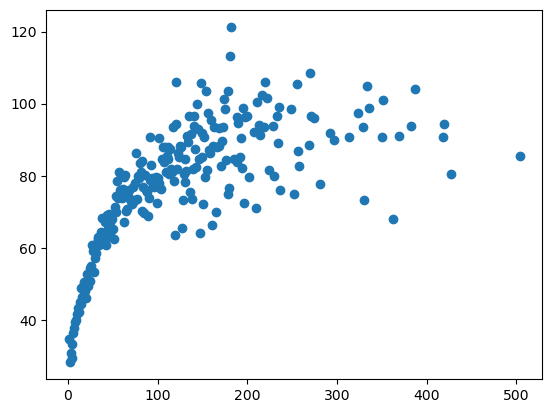

In [4]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [5]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_AstroPh)

0.20131706127372678

In [6]:
#randomised network
# AstroPh_random
num=g_AstroPh.number_of_nodes()
g1=nx.read_gml("graph_AstroPh.gml")
g2=nx.read_gml("graph_AstroPh_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [7]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{43: 68.12060573282855,
 36: 66.97554605887939,
 46: 66.53550724637681,
 31: 66.03456221198157,
 48: 65.35239361702128,
 29: 65.62068965517241,
 33: 64.92242424242424,
 39: 64.29582146248814,
 38: 66.00137061403508,
 32: 65.66091417910448,
 37: 66.74829374829375,
 25: 62.63410256410256,
 51: 66.6413043478261,
 82: 64.79056203605515,
 62: 65.95519713261649,
 44: 66.24971941638609,
 2: 61.276580958999304,
 3: 60.901556776556774,
 12: 62.96823617339312,
 6: 63.800632911392405,
 4: 61.670539419087135,
 19: 64.32889695503125,
 13: 63.74673439767779,
 1: 59.71264367816092,
 80: 67.4359756097561,
 15: 63.282758620689656,
 18: 62.80236159504452,
 108: 68.18981481481481,
 7: 62.50426136363637,
 50: 67.16459016393442,
 10: 62.47876857749469,
 21: 64.3719298245614,
 17: 64.73872906826965,
 28: 65.70973612374887,
 30: 65.37995642701524,
 55: 66.71760154738878,
 87: 69.04545454545455,
 157: 69.05095541401273,
 81: 66.17239858906525,
 154: 68.50649350649351,
 146: 68.41095890410959,
 65: 66.13931623

In [8]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

0.016786718783262843

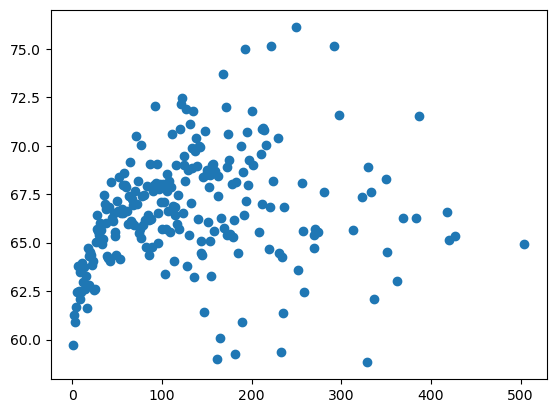

In [9]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>  Clustering and randomisation

In [10]:
# function to calculate the average degree
def ave_degree(g):
    N=g.number_of_nodes()
    g_degree=g.degree()
    g_degrees=[g_degree[i] for i in g.nodes()]
    g_sum_degree=0
    for i in range (N):
        g_sum_degree+=g_degrees[i]
    ave=g_sum_degree/N
    return ave

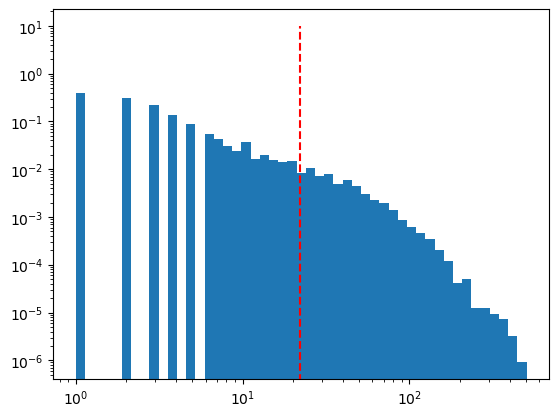

In [11]:
# plot the degree distribution of AstroPh
k_AstroPh=ave_degree(g_AstroPh)
g_AstroPh_degree=g_AstroPh.degree()
g_AstroPh_degrees = [ g_AstroPh_degree[i] for i in g_AstroPh.nodes() ]
my_bins = np.logspace(np.log10(min(g_AstroPh_degrees)),np.log10(max(g_AstroPh_degrees) +1),50) 
_ = plt.hist(g_AstroPh_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_AstroPh,0,10,colors = "r", linestyles = "dashed")
plt.show()

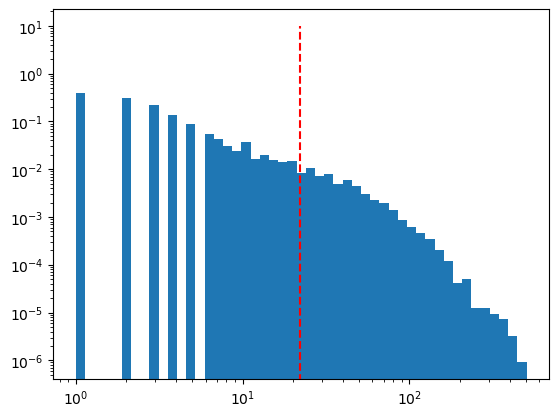

In [12]:
# plot the degree distribution of AstroPh_random
k_AstroPhr=ave_degree(gf)
g_AstroPhr_degree=gf.degree()
g_AstroPhr_degrees = [ g_AstroPhr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_AstroPhr_degrees)),np.log10(max(g_AstroPhr_degrees) +1),50) 
_ = plt.hist(g_AstroPhr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_AstroPhr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [13]:
# calculate the clustering coefficient of AstroPh
g_AstroPh_clu=nx.clustering(g_AstroPh)
g_AstroPh_clu

{'0': 0.6921373200442967,
 '1': 0.7333333333333333,
 '2': 0.6579710144927536,
 '3': 0.8043010752688172,
 '4': 0.4397163120567376,
 '5': 0.9137931034482759,
 '6': 0.8409090909090909,
 '7': 0.6828609986504723,
 '8': 0.6699857752489331,
 '9': 0.7540322580645161,
 '10': 0.6816816816816816,
 '11': 0.5526024363233666,
 '12': 0.4995169082125604,
 '13': 1.0,
 '14': 1.0,
 '15': 0.6699857752489331,
 '16': 0.633816425120773,
 '17': 0.8043010752688172,
 '18': 1.0,
 '19': 1.0,
 '20': 1.0,
 '21': 0.5458823529411765,
 '22': 0.5811764705882353,
 '23': 0.5811764705882353,
 '24': 1.0,
 '25': 0.7520161290322581,
 '26': 1.0,
 '27': 1.0,
 '28': 0.7463054187192119,
 '29': 1.0,
 '30': 0.6828609986504723,
 '31': 0.2408912978018669,
 '32': 0.6828609986504723,
 '33': 1.0,
 '34': 0.3955579058699101,
 '35': 1.0,
 '36': 1.0,
 '37': 0.627906976744186,
 '38': 1.0,
 '39': 1.0,
 '40': 1.0,
 '41': 0.5811764705882353,
 '42': 1.0,
 '43': 0.8,
 '44': 1.0,
 '45': 1.0,
 '46': 0.3333333333333333,
 '47': 0.24242424242424243,


In [14]:
# calculate the clustering coefficient of AstroPh_random
g_AstroPhr_clu=nx.clustering(gf)
g_AstroPhr_clu

{'0': 0.017718715393133997,
 '1': 0.009523809523809525,
 '2': 0.005797101449275362,
 '3': 0.004301075268817204,
 '4': 0.008865248226950355,
 '5': 0.009852216748768473,
 '6': 0.017045454545454544,
 '7': 0.01349527665317139,
 '8': 0.012802275960170697,
 '9': 0.012096774193548387,
 '10': 0.006006006006006006,
 '11': 0.004429678848283499,
 '12': 0.00676328502415459,
 '13': 0.0033333333333333335,
 '14': 0.013333333333333334,
 '15': 0.017069701280227598,
 '16': 0.00676328502415459,
 '17': 0.015053763440860216,
 '18': 0.02666666666666667,
 '19': 0.01,
 '20': 0.006666666666666667,
 '21': 0.010980392156862745,
 '22': 0.012549019607843137,
 '23': 0.006274509803921568,
 '24': 0,
 '25': 0.010080645161290322,
 '26': 0.016666666666666666,
 '27': 0.006666666666666667,
 '28': 0.014778325123152709,
 '29': 0.03,
 '30': 0.008097165991902834,
 '31': 0.009334537789822343,
 '32': 0.022941970310391364,
 '33': 0.01,
 '34': 0.013220518244315178,
 '35': 0.013333333333333334,
 '36': 0.03,
 '37': 0.00951374207188

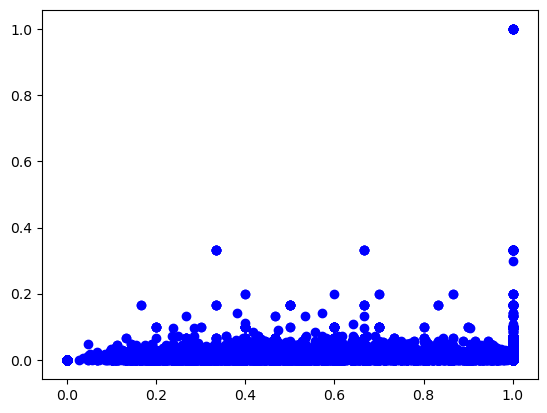

In [15]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_AstroPh_clu.keys()
y1 = g_AstroPh_clu.values()
y2 = g_AstroPhr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

<font size=6 face="黑体">celegansInteractomes and celegansInteractomes_random</font>

<font size=4 face="黑体">A02.1</font>

In [16]:
# compute the average degree of the nearest neighbours
g_celegansInteractomes = nx.read_gml("graph_celegansInteractomes.gml")
ad=nx.average_degree_connectivity(g_celegansInteractomes)
ad

{19: 206.68,
 810: 292.1925925925926,
 355: 329.5934272300469,
 466: 362.5692060085837,
 140: 272.3410714285714,
 213: 369.1478873239437,
 86: 281.49302325581397,
 465: 371.3247311827957,
 332: 382.9457831325301,
 931: 239.5875402792696,
 504: 371.95188492063494,
 27: 225.4750957854406,
 491: 362.28716904276985,
 645: 332.34961240310076,
 221: 411.3710407239819,
 522: 317.85057471264366,
 215: 360.5325581395349,
 548: 360.1240875912409,
 489: 354.45501022494886,
 578: 342.739907727797,
 420: 349.7529761904762,
 196: 315.1756559766764,
 137: 431.88868613138686,
 21: 206.40666666666667,
 114: 340.4766081871345,
 25: 165.94787878787878,
 358: 397.036312849162,
 111: 303.8288288288288,
 476: 375.00735294117646,
 312: 399.21634615384613,
 212: 425.7051886792453,
 688: 314.23401162790697,
 230: 432.0782608695652,
 6: 146.79479166666667,
 484: 361.1384297520661,
 145: 210.48045977011495,
 174: 379.68199233716473,
 326: 384.4601226993865,
 313: 373.73482428115017,
 216: 377.9527777777778,
 126

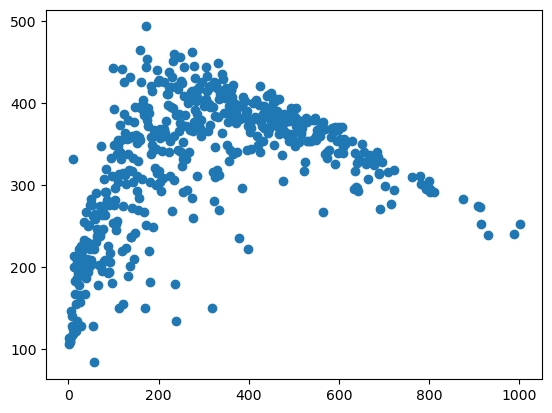

In [17]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [18]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_celegansInteractomes)

0.15169796960230705

In [19]:
#randomised network
# celegansInteractomes_random
num=g_celegansInteractomes.number_of_nodes()
g1=nx.read_gml("graph_celegansInteractomes.gml")
g2=nx.read_gml("graph_celegansInteractomes_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [20]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{19: 389.29894736842107,
 810: 250.5888888888889,
 355: 318.36150234741785,
 466: 293.8299356223176,
 140: 356.4642857142857,
 213: 344.49295774647885,
 86: 382.6279069767442,
 465: 307.16021505376347,
 332: 311.8333333333333,
 931: 231.32438238453275,
 504: 296.60863095238096,
 27: 387.0893997445722,
 491: 290.0631364562118,
 645: 272.3782945736434,
 221: 357.6787330316742,
 522: 286.2068965517241,
 215: 354.16279069767444,
 548: 283.536496350365,
 489: 288.61860940695294,
 578: 281.4878892733564,
 420: 300.88988095238096,
 196: 347.40524781341105,
 137: 362.3740875912409,
 21: 380.14190476190475,
 114: 359.10818713450294,
 25: 359.69454545454545,
 358: 329.60893854748605,
 111: 355.1171171171171,
 476: 300.452731092437,
 312: 333.56570512820514,
 212: 348.876179245283,
 688: 265.2005813953488,
 230: 335.44347826086954,
 6: 370.8052083333333,
 484: 292.1415289256198,
 145: 347.65977011494255,
 174: 345.27969348659,
 326: 318.54294478527606,
 313: 316.76837060702877,
 216: 329.35555555

In [21]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.16041270078807657

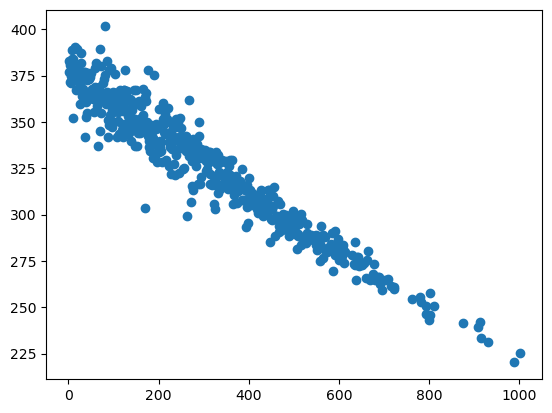

In [22]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

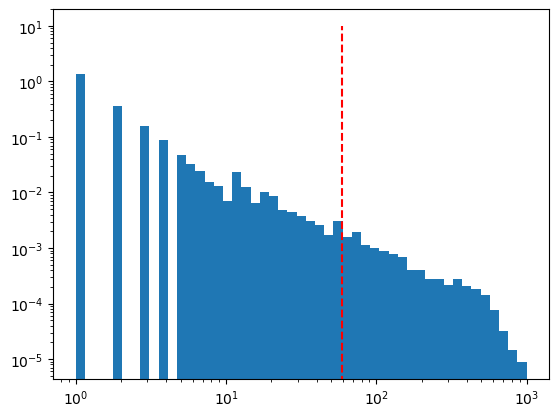

In [23]:
# plot the degree distribution of celegansInteractomes
k_celegansInteractomes=ave_degree(g_celegansInteractomes)
g_celegansInteractomes_degree=g_celegansInteractomes.degree()
g_celegansInteractomes_degrees = [ g_celegansInteractomes_degree[i] for i in g_celegansInteractomes.nodes() ]
my_bins = np.logspace(np.log10(min(g_celegansInteractomes_degrees)),np.log10(max(g_celegansInteractomes_degrees) +1),50) 
_ = plt.hist(g_celegansInteractomes_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_celegansInteractomes,0,10,colors = "r", linestyles = "dashed")
plt.show()

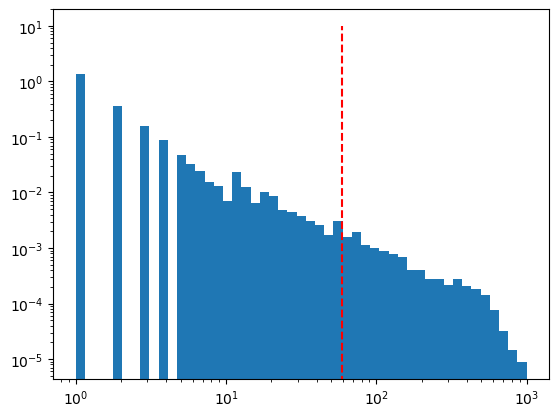

In [24]:
# plot the degree distribution of celegansInteractomes_random
k_celegansInteractomesr=ave_degree(gf)
g_celegansInteractomesr_degree=gf.degree()
g_celegansInteractomesr_degrees = [ g_celegansInteractomesr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_celegansInteractomesr_degrees)),np.log10(max(g_celegansInteractomesr_degrees) +1),50) 
_ = plt.hist(g_celegansInteractomesr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_celegansInteractomesr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [25]:
# calculate the clustering coefficient of celegansInteractomes
g_celegansInteractomes_clu=nx.clustering(g_celegansInteractomes)
g_celegansInteractomes_clu

{'0': 0.9122807017543859,
 '1': 0.2941506813777106,
 '2': 0.6031988541418,
 '3': 0.31737505191748583,
 '4': 0.6843782117163412,
 '5': 0.4534945522189742,
 '6': 0.8656634746922025,
 '7': 0.5068502039302929,
 '8': 0.5839733556582827,
 '9': 0.1966945012300336,
 '10': 0.5500331345261763,
 '11': 0.6866096866096866,
 '12': 0.47636227607132464,
 '13': 0.39368770764119604,
 '14': 0.6944055944055944,
 '15': 0.37555246688875654,
 '16': 0.47735018460664586,
 '17': 0.5435774831558357,
 '18': 0.46126182628537876,
 '19': 0.4317191323879446,
 '20': 0.4249458780351778,
 '21': 0.4493465166496193,
 '22': 0.6960753532182103,
 '23': 0.7112494632889652,
 '24': 0.8523809523809524,
 '25': 0.6714795839155411,
 '26': 0.8733333333333333,
 '27': 0.5061734190883057,
 '28': 0.8401310401310401,
 '29': 0.5366651923927466,
 '30': 0.674086899167285,
 '31': 0.7173835285701511,
 '32': 0.32424427067465555,
 '33': 0.7394342130244921,
 '34': 0.6,
 '35': 0.4527488321954725,
 '36': 0.33783524904214557,
 '37': 0.7257989502358

In [26]:
# calculate the clustering coefficient of celegansInteractomes_random
g_celegansInteractomesr_clu=nx.clustering(gf)
g_celegansInteractomesr_clu

{'0': 0.4502923976608187,
 '1': 0.17084954752857515,
 '2': 0.27760006365878886,
 '3': 0.23439937237528266,
 '4': 0.35200411099691675,
 '5': 0.31366817255735674,
 '6': 0.34829001367989054,
 '7': 0.2523544679273267,
 '8': 0.2755068612819859,
 '9': 0.1476086529688276,
 '10': 0.22966171226608603,
 '11': 0.21937321937321938,
 '12': 0.22542915333139366,
 '13': 0.20936010400115557,
 '14': 0.3309749074454957,
 '15': 0.21929534273170517,
 '16': 0.230355959481208,
 '17': 0.32897196261682243,
 '18': 0.21678298349324118,
 '19': 0.22227530255791345,
 '20': 0.2129137106978585,
 '21': 0.2367200818274804,
 '22': 0.2862899005756149,
 '23': 0.3162301416917132,
 '24': 0.48095238095238096,
 '25': 0.31547896289396055,
 '26': 0.30666666666666664,
 '27': 0.2850570395756068,
 '28': 0.2556920556920557,
 '29': 0.24051304732419285,
 '30': 0.28367961085002885,
 '31': 0.3397567736743271,
 '32': 0.19131884499509158,
 '33': 0.2935257262198595,
 '34': 0.6,
 '35': 0.2289923515219958,
 '36': 0.33132183908045976,
 '37':

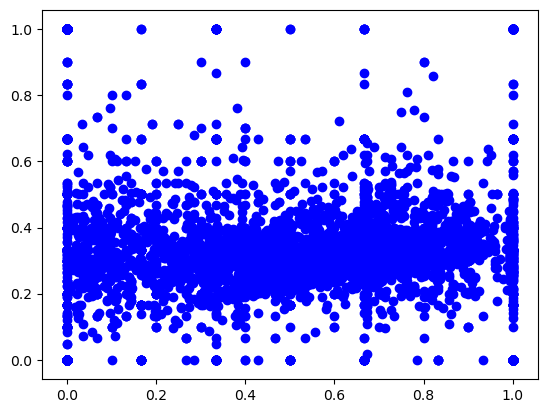

In [27]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_celegansInteractomes_clu.keys()
y1 = g_celegansInteractomes_clu.values()
y2 = g_celegansInteractomesr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

<font size=6 face="黑体">chess and chess_random</font>

<font size=4 face="黑体">A02.1</font>

In [28]:
# compute the average degree of the nearest neighbours
g_chess = nx.read_gml("graph_chess.gml")
ad=nx.average_degree_connectivity(g_chess)
ad

{42: 52.042443064182194,
 86: 66.15116279069767,
 61: 57.92559899117276,
 12: 32.057199211045365,
 17: 37.98729946524064,
 76: 40.94736842105263,
 9: 30.609767025089607,
 19: 37.09556786703601,
 117: 66.61823361823362,
 4: 24.337570621468927,
 2: 20.94214876033058,
 64: 52.071875,
 43: 51.22713178294573,
 114: 88.06140350877193,
 23: 38.344429347826086,
 3: 23.98548387096774,
 97: 71.69329896907216,
 41: 43.58638211382114,
 27: 42.98148148148148,
 6: 26.99176356589147,
 30: 42.27894736842105,
 67: 54.733830845771145,
 39: 48.77014652014652,
 8: 30.242395437262356,
 73: 57.94894146948941,
 21: 38.45157838416265,
 112: 79.48549107142857,
 55: 55.10151515151515,
 49: 50.55994897959184,
 22: 38.25280199252802,
 106: 77.14779874213836,
 29: 43.73965517241379,
 36: 46.46507936507936,
 66: 59.45117845117845,
 18: 35.19767441860465,
 50: 54.83125,
 142: 72.69366197183099,
 71: 57.073239436619716,
 34: 44.285427807486634,
 85: 58.917647058823526,
 51: 51.54248366013072,
 79: 60.061181434599156,

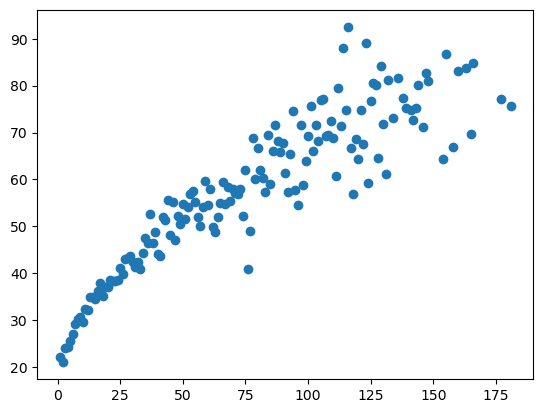

In [29]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [30]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_chess)

0.3705153782729769

In [31]:
#randomised network
# chess_random
num=g_chess.number_of_nodes()
g1=nx.read_gml("graph_chess.gml")
g2=nx.read_gml("graph_chess_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [32]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{42: 48.94824016563147,
 86: 49.55555555555556,
 61: 48.722572509457756,
 12: 45.231262327416175,
 17: 47.61363636363637,
 76: 46.80263157894737,
 9: 45.80017921146953,
 19: 46.32963988919668,
 117: 52.59544159544159,
 4: 44.919962335216574,
 2: 45.99517906336088,
 64: 46.655208333333334,
 43: 49.29457364341085,
 114: 48.5,
 23: 44.73029891304348,
 3: 46.39623655913979,
 97: 47.95103092783505,
 41: 44.824186991869915,
 27: 46.04666666666667,
 6: 43.25484496124031,
 30: 46.60087719298246,
 67: 48.70398009950249,
 39: 46.78663003663004,
 8: 45.95912547528517,
 73: 46.03362391033624,
 21: 47.208132691278756,
 112: 51.767857142857146,
 55: 48.39090909090909,
 49: 47.92602040816327,
 22: 47.497509339975096,
 106: 48.67610062893082,
 29: 47.68448275862069,
 36: 47.02857142857143,
 66: 49.466329966329965,
 18: 43.998062015503876,
 50: 48.36375,
 142: 51.33802816901409,
 71: 49.136150234741784,
 34: 46.973930481283425,
 85: 48.06470588235294,
 51: 46.97385620915033,
 79: 49.11603375527426,
 12

In [33]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

0.040416830465474146

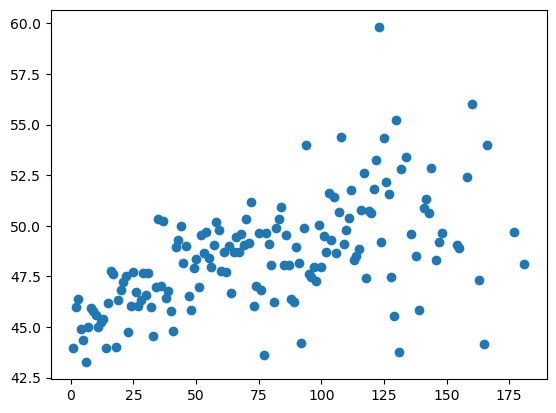

In [34]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

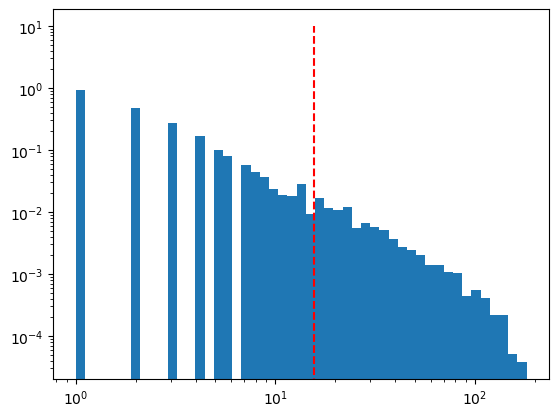

In [35]:
# plot the degree distribution of chess
k_chess=ave_degree(g_chess)
g_chess_degree=g_chess.degree()
g_chess_degrees = [ g_chess_degree[i] for i in g_chess.nodes() ]
my_bins = np.logspace(np.log10(min(g_chess_degrees)),np.log10(max(g_chess_degrees) +1),50) 
_ = plt.hist(g_chess_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_chess,0,10,colors = "r", linestyles = "dashed")
plt.show()

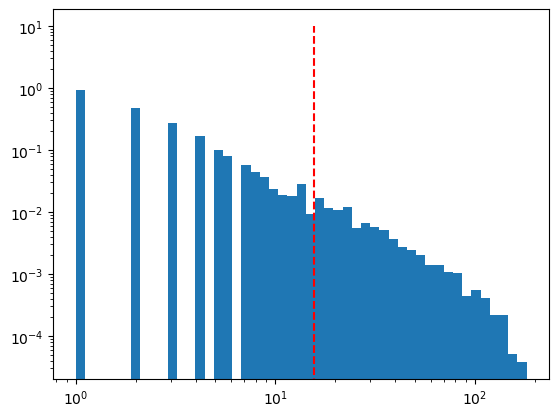

In [36]:
# plot the degree distribution of chess_random
k_chessr=ave_degree(gf)
g_chessr_degree=gf.degree()
g_chessr_degrees = [ g_chessr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_chessr_degrees)),np.log10(max(g_chessr_degrees) +1),50) 
_ = plt.hist(g_chessr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_chessr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [37]:
# calculate the clustering coefficient of chess
g_chess_clu=nx.clustering(g_chess)
g_chess_clu

{'0': 0.15098722415795587,
 '1': 0.14336525307797537,
 '2': 0.1737704918032787,
 '3': 0.36363636363636365,
 '4': 0.16911764705882354,
 '5': 0.06947368421052631,
 '6': 0.1388888888888889,
 '7': 0.1871345029239766,
 '8': 0.10418508694370764,
 '9': 0,
 '10': 0,
 '11': 0.09275793650793651,
 '12': 0.5193798449612403,
 '13': 0.19142990218910108,
 '14': 0.03557312252964427,
 '15': 0,
 '16': 0.10115979381443299,
 '17': 0.06219512195121951,
 '18': 0.09401709401709402,
 '19': 0.12121212121212122,
 '20': 0.06393442622950819,
 '21': 0.2,
 '22': 0.1839080459770115,
 '23': 0.07236544549977386,
 '24': 0.05257936507936508,
 '25': 1.0,
 '26': 0.6666666666666666,
 '27': 0.11740890688259109,
 '28': 0.10714285714285714,
 '29': 0.11643835616438356,
 '30': 0.34285714285714286,
 '31': 0.0682110682110682,
 '32': 0.1367003367003367,
 '33': 0.09948979591836735,
 '34': 0.08225108225108226,
 '35': 0.0761904761904762,
 '36': 0.16748768472906403,
 '37': 0.21587301587301588,
 '38': 0.14918414918414918,
 '39': 0.7189

In [38]:
# calculate the clustering coefficient of chess_random
g_chessr_clu=nx.clustering(gf)
g_chessr_clu

{'0': 0.030197444831591175,
 '1': 0.018057455540355677,
 '2': 0.023497267759562842,
 '3': 0,
 '4': 0.051470588235294115,
 '5': 0.020701754385964912,
 '6': 0.027777777777777776,
 '7': 0.005847953216374269,
 '8': 0.02475685234305924,
 '9': 0.16666666666666666,
 '10': 0,
 '11': 0.021825396825396824,
 '12': 0.02547065337763012,
 '13': 0.021891010712622262,
 '14': 0.019762845849802372,
 '15': 0,
 '16': 0.01761168384879725,
 '17': 0.025609756097560974,
 '18': 0.005698005698005698,
 '19': 0.015151515151515152,
 '20': 0.03333333333333333,
 '21': 0,
 '22': 0.027586206896551724,
 '23': 0.020805065581184983,
 '24': 0.018849206349206348,
 '25': 0,
 '26': 0,
 '27': 0.01349527665317139,
 '28': 0,
 '29': 0.017123287671232876,
 '30': 0.02857142857142857,
 '31': 0.02010939510939511,
 '32': 0.01818181818181818,
 '33': 0.01870748299319728,
 '34': 0.017316017316017316,
 '35': 0.01761006289308176,
 '36': 0.017241379310344827,
 '37': 0.015873015873015872,
 '38': 0.022843822843822845,
 '39': 0.01307189542483

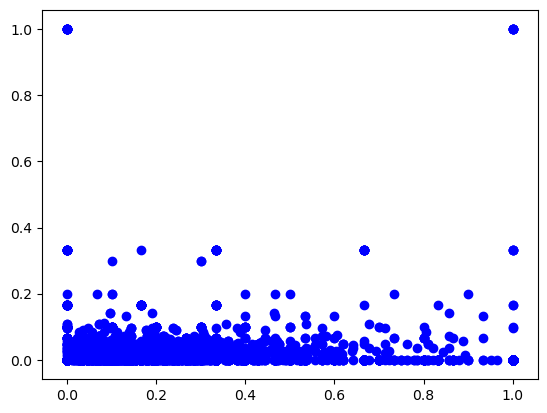

In [39]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_chess_clu.keys()
y1 = g_chess_clu.values()
y2 = g_chessr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

<font size=6 face="黑体">CondMat and CondMat_random</font>

<font size=4 face="黑体">A02.1</font>

In [40]:
# compute the average degree of the nearest neighbours
g_CondMat = nx.read_gml("graph_CondMat.gml")
ad=nx.average_degree_connectivity(g_CondMat)
ad

{3: 14.947077713551701,
 8: 20.42218625498008,
 5: 17.410486073184053,
 17: 22.815328054298643,
 43: 28.203488372093023,
 103: 24.941747572815533,
 44: 34.07644628099174,
 16: 22.687251984126984,
 75: 31.914666666666665,
 76: 34.41282894736842,
 31: 28.226478494623656,
 2: 14.758211678832117,
 57: 24.69924812030075,
 4: 16.302467763450423,
 19: 22.881378573336896,
 21: 24.228701004211207,
 6: 17.841338670224594,
 13: 22.291800507185123,
 34: 30.75993640699523,
 1: 15.716354858177429,
 20: 26.005985915492957,
 49: 27.117346938775512,
 29: 24.29310344827586,
 40: 27.535576923076924,
 46: 28.67056856187291,
 9: 20.202460410940976,
 14: 22.843711843711844,
 12: 21.24355158730159,
 32: 26.91509433962264,
 11: 21.30612577386771,
 24: 24.42138364779874,
 7: 18.806484295845998,
 86: 33.127906976744185,
 98: 27.26530612244898,
 26: 23.73076923076923,
 15: 21.859531090723753,
 51: 28.419934640522875,
 42: 26.96212121212121,
 18: 25.23864734299517,
 56: 29.797619047619047,
 37: 26.4179301252472,


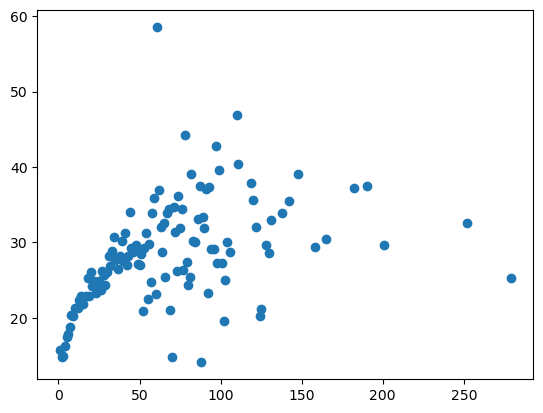

In [41]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [42]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_CondMat)

0.12528250398544855

In [43]:
#randomised network
# CondMat_random
num=g_CondMat.number_of_nodes()
g1=nx.read_gml("graph_CondMat.gml")
g2=nx.read_gml("graph_CondMat_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [44]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{3: 21.922928709055878,
 8: 22.1875,
 5: 21.847405789186237,
 17: 22.009615384615383,
 43: 22.239825581395348,
 103: 24.271844660194176,
 44: 23.541322314049587,
 16: 22.616815476190474,
 75: 26.032,
 76: 22.661184210526315,
 31: 23.1377688172043,
 2: 21.51277372262774,
 57: 23.090225563909776,
 4: 21.813472654513117,
 19: 22.66497461928934,
 21: 22.770327178490444,
 6: 21.45285746052924,
 13: 23.183601014370247,
 34: 22.64785373608903,
 1: 22.64815932407966,
 20: 22.53767605633803,
 49: 21.700255102040817,
 29: 23.192610837438423,
 40: 22.523076923076925,
 46: 22.377926421404684,
 9: 22.137547441434368,
 14: 22.296092796092797,
 12: 22.261904761904763,
 32: 22.68808962264151,
 11: 22.28396871945259,
 24: 23.279088050314467,
 7: 22.34436564223798,
 86: 23.563953488372093,
 98: 23.821428571428573,
 26: 22.571505958829903,
 15: 22.481957186544342,
 51: 22.037581699346404,
 42: 23.463203463203463,
 18: 23.606280193236714,
 56: 22.567460317460316,
 37: 21.651944627554382,
 148: 25.29054054

In [45]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

0.010626136622392294

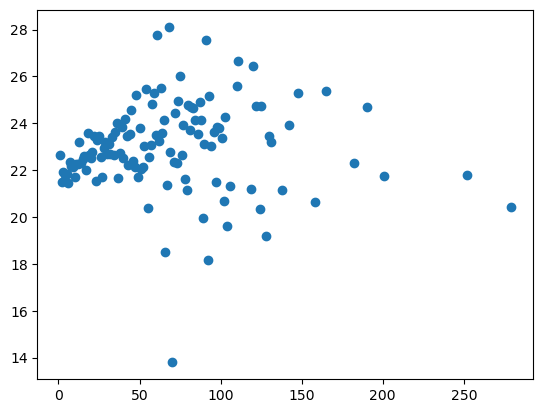

In [46]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

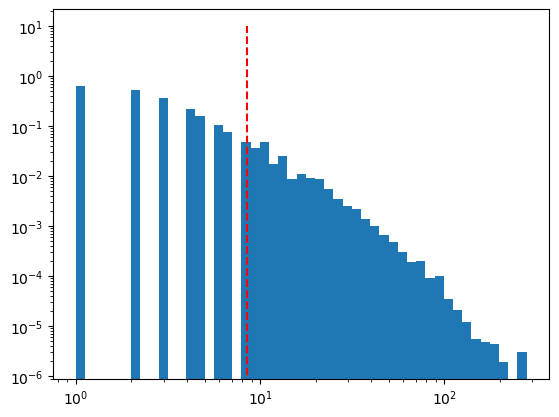

In [47]:
# plot the degree distribution of CondMat
k_CondMat=ave_degree(g_CondMat)
g_CondMat_degree=g_CondMat.degree()
g_CondMat_degrees = [ g_CondMat_degree[i] for i in g_CondMat.nodes() ]
my_bins = np.logspace(np.log10(min(g_CondMat_degrees)),np.log10(max(g_CondMat_degrees) +1),50) 
_ = plt.hist(g_CondMat_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_CondMat,0,10,colors = "r", linestyles = "dashed")
plt.show()

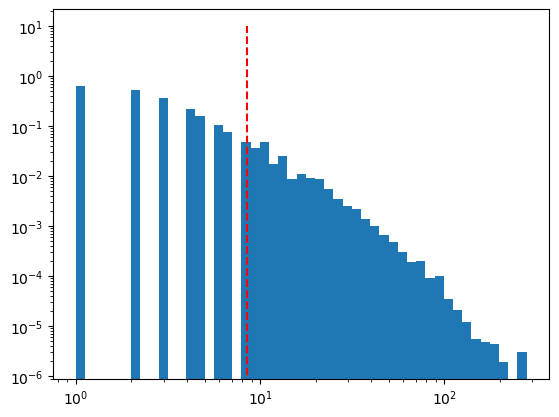

In [48]:
# plot the degree distribution of CondMat_random
k_CondMatr=ave_degree(gf)
g_CondMatr_degree=gf.degree()
g_CondMatr_degrees = [ g_CondMatr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_CondMatr_degrees)),np.log10(max(g_CondMatr_degrees) +1),50) 
_ = plt.hist(g_CondMatr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_CondMatr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [49]:
# calculate the clustering coefficient of CondMat
g_CondMat_clu=nx.clustering(g_CondMat)
g_CondMat_clu

{'0': 1.0,
 '1': 0.39285714285714285,
 '2': 0.8,
 '3': 0.8,
 '4': 1.0,
 '5': 0.39705882352941174,
 '6': 0.2912513842746401,
 '7': 0.08623643632210165,
 '8': 0.26955602536997886,
 '9': 0.5166666666666667,
 '10': 0.1744144144144144,
 '11': 0.12210526315789473,
 '12': 0.33548387096774196,
 '13': 1.0,
 '14': 0.11403508771929824,
 '15': 0.21428571428571427,
 '16': 1.0,
 '17': 0.14619883040935672,
 '18': 1.0,
 '19': 0.4642857142857143,
 '20': 0.19523809523809524,
 '21': 1.0,
 '22': 0.8,
 '23': 0.19230769230769232,
 '24': 0.4642857142857143,
 '25': 0.8,
 '26': 0.19073083778966132,
 '27': 1.0,
 '28': 0.3333333333333333,
 '29': 0.2857142857142857,
 '30': 0.3333333333333333,
 '31': 1.0,
 '32': 0,
 '33': 0.07894736842105263,
 '34': 0.17894736842105263,
 '35': 1.0,
 '36': 0.23391812865497075,
 '37': 1.0,
 '38': 1.0,
 '39': 0.13945578231292516,
 '40': 1.0,
 '41': 0.8,
 '42': 0.6666666666666666,
 '43': 0.25862068965517243,
 '44': 1.0,
 '45': 0.17564102564102563,
 '46': 0.23671497584541062,
 '47': 0.

In [50]:
# calculate the clustering coefficient of CondMat_random
g_CondMatr_clu=nx.clustering(gf)
g_CondMatr_clu

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0.03571428571428571,
 '5': 0,
 '6': 0.006644518272425249,
 '7': 0.0028555111364934323,
 '8': 0,
 '9': 0.008333333333333333,
 '10': 0.005405405405405406,
 '11': 0.0017543859649122807,
 '12': 0.002150537634408602,
 '13': 0,
 '14': 0.003132832080200501,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0.0071301247771836,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0.010526315789473684,
 '34': 0.005263157894736842,
 '35': 0,
 '36': 0.005847953216374269,
 '37': 0,
 '38': 0,
 '39': 0.0008503401360544217,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0.002564102564102564,
 '46': 0.003864734299516908,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0.01282051282051282,
 '51': 0,
 '52': 0,
 '53': 0.015151515151515152,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0.0020161290322580645,
 '58': 0.015151515151515152,
 '59': 0.01818181818181818,
 '60': 0.007246376811594203,
 '

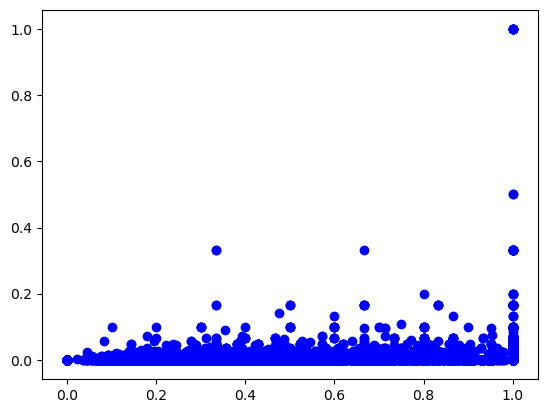

In [51]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_CondMat_clu.keys()
y1 = g_CondMat_clu.values()
y2 = g_CondMatr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

<font size=6 face="黑体">dolphins and dolphins_random</font>

<font size=4 face="黑体">A02.1</font>

In [52]:
# compute the average degree of the nearest neighbours
g_dolphins = nx.read_gml("graph_dolphins.gml")
ad=nx.average_degree_connectivity(g_dolphins)
ad

{6: 7.708333333333333,
 3: 6.5,
 7: 7.26530612244898,
 4: 6.6,
 5: 6.5,
 8: 6.5625,
 12: 6.75,
 9: 5.833333333333333,
 1: 8.555555555555555,
 10: 6.2,
 11: 7.181818181818182,
 2: 5.75}

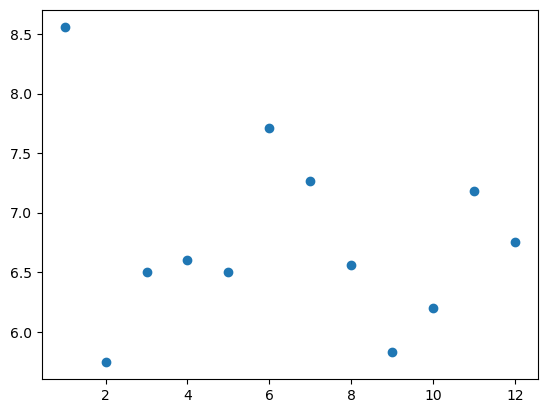

In [53]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [54]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_dolphins)

-0.04359402821531255

In [55]:
#randomised network
# dolphins_random
num=g_dolphins.number_of_nodes()
g1=nx.read_gml("graph_dolphins.gml")
g2=nx.read_gml("graph_dolphins_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [56]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{6: 6.6875,
 3: 7.111111111111111,
 7: 6.836734693877551,
 4: 7.75,
 5: 6.3,
 8: 7.03125,
 12: 6.583333333333333,
 9: 6.694444444444445,
 1: 6.0,
 10: 6.5,
 11: 7.0,
 2: 7.5}

In [57]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.020073962470894016

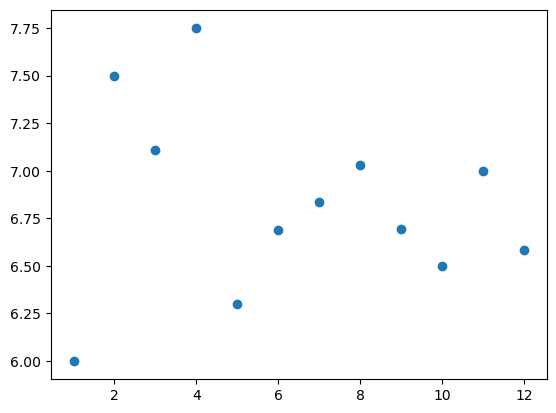

In [58]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

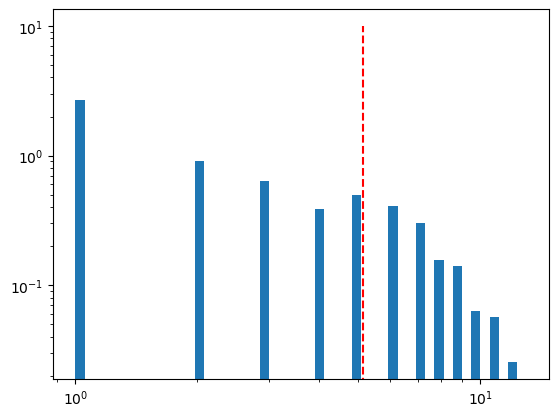

In [59]:
# plot the degree distribution of dolphins
k_dolphins=ave_degree(g_dolphins)
g_dolphins_degree=g_dolphins.degree()
g_dolphins_degrees = [ g_dolphins_degree[i] for i in g_dolphins.nodes() ]
my_bins = np.logspace(np.log10(min(g_dolphins_degrees)),np.log10(max(g_dolphins_degrees) +1),50) 
_ = plt.hist(g_dolphins_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_dolphins,0,10,colors = "r", linestyles = "dashed")
plt.show()

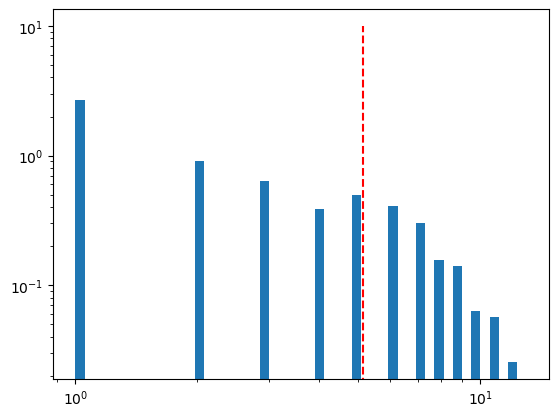

In [60]:
# plot the degree distribution of dolphins_random
k_dolphinsr=ave_degree(gf)
g_dolphinsr_degree=gf.degree()
g_dolphinsr_degrees = [ g_dolphinsr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_dolphinsr_degrees)),np.log10(max(g_dolphinsr_degrees) +1),50) 
_ = plt.hist(g_dolphinsr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_dolphinsr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [61]:
# calculate the clustering coefficient of dolphins
g_dolphins_clu=nx.clustering(g_dolphins)
g_dolphins_clu

{'0': 0.26666666666666666,
 '1': 0.3333333333333333,
 '2': 0.5238095238095238,
 '3': 0.5,
 '4': 0.5333333333333333,
 '5': 0.4,
 '6': 0.3333333333333333,
 '7': 0.16666666666666666,
 '8': 0.5,
 '9': 0.25757575757575757,
 '10': 0.23809523809523808,
 '11': 0.6,
 '12': 0.2222222222222222,
 '13': 0.14285714285714285,
 '14': 0.5238095238095238,
 '15': 0.5,
 '16': 0.2,
 '17': 0.1388888888888889,
 '18': 0.5333333333333333,
 '19': 0,
 '20': 0.5333333333333333,
 '21': 0.6666666666666666,
 '22': 0.6666666666666666,
 '23': 0.4,
 '24': 0.3,
 '25': 0.25,
 '26': 0.3,
 '27': 0,
 '28': 0.3333333333333333,
 '29': 0.3333333333333333,
 '30': 0,
 '31': 0.3,
 '32': 0,
 '33': 0.047619047619047616,
 '34': 0.3333333333333333,
 '35': 0.23636363636363636,
 '36': 0.2857142857142857,
 '37': 0,
 '38': 0.25,
 '39': 0.6,
 '40': 0.3333333333333333,
 '41': 0.23809523809523808,
 '42': 0.16666666666666666,
 '43': 0.3090909090909091,
 '44': 0,
 '45': 0.4,
 '46': 0,
 '47': 0.23809523809523808,
 '48': 0.24444444444444444,
 '

In [62]:
# calculate the clustering coefficient of dolphins_random
g_dolphinsr_clu=nx.clustering(gf)
g_dolphinsr_clu

{'0': 0.13333333333333333,
 '1': 0,
 '2': 0.047619047619047616,
 '3': 0.3333333333333333,
 '4': 0.06666666666666667,
 '5': 0.3,
 '6': 0.06666666666666667,
 '7': 0.16666666666666666,
 '8': 0.17857142857142858,
 '9': 0.10606060606060606,
 '10': 0.19047619047619047,
 '11': 0.06666666666666667,
 '12': 0.05555555555555555,
 '13': 0.14285714285714285,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0.08333333333333333,
 '18': 0.13333333333333333,
 '19': 0,
 '20': 0.06666666666666667,
 '21': 0,
 '22': 0,
 '23': 0.1,
 '24': 0.3,
 '25': 0.16666666666666666,
 '26': 0,
 '27': 0,
 '28': 0.3333333333333333,
 '29': 0.08888888888888889,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0.09523809523809523,
 '34': 0.3333333333333333,
 '35': 0.10909090909090909,
 '36': 0.21428571428571427,
 '37': 1.0,
 '38': 0.17857142857142858,
 '39': 0.1,
 '40': 0.2,
 '41': 0.09523809523809523,
 '42': 0.16666666666666666,
 '43': 0.12727272727272726,
 '44': 0,
 '45': 0.06666666666666667,
 '46': 1.0,
 '47': 0.14285714285714285,
 '48': 0.06666

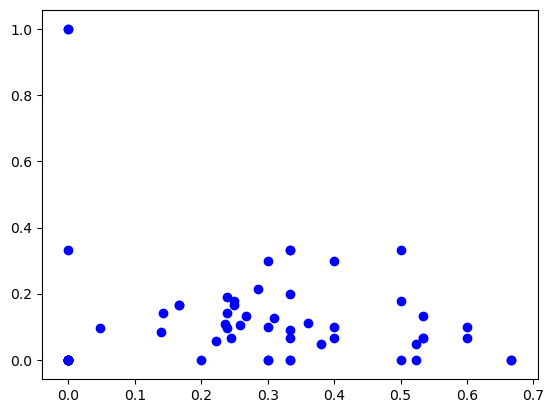

In [63]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_dolphins_clu.keys()
y1 = g_dolphins_clu.values()
y2 = g_dolphinsr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

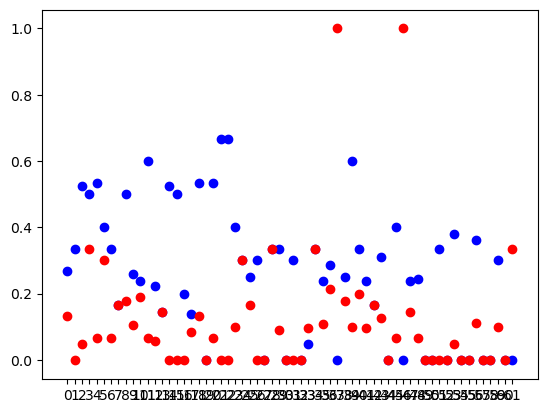

In [64]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">eu_airlines and eu_airlines_random</font>

<font size=4 face="黑体">A02.1</font>

In [65]:
# compute the average degree of the nearest neighbours
g_eu_airlines = nx.read_gml("graph_eu_airlines.gml")
ad=nx.average_degree_connectivity(g_eu_airlines)
ad

{13: 44.92307692307692,
 91: 38.56043956043956,
 100: 36.08,
 99: 31.09090909090909,
 53: 47.35849056603774,
 80: 36.18125,
 15: 51.142857142857146,
 55: 46.96363636363636,
 42: 40.26190476190476,
 8: 55.921875,
 70: 32.92857142857143,
 25: 52.28,
 64: 39.140625,
 56: 45.892857142857146,
 78: 40.30769230769231,
 23: 57.70652173913044,
 37: 49.17567567567568,
 103: 37.33980582524272,
 34: 40.14705882352941,
 46: 38.20652173913044,
 40: 46.016666666666666,
 79: 40.69620253164557,
 82: 32.01219512195122,
 63: 46.698412698412696,
 48: 44.833333333333336,
 24: 48.0,
 59: 37.983050847457626,
 22: 50.60227272727273,
 95: 38.57368421052632,
 12: 53.523809523809526,
 17: 46.220588235294116,
 28: 39.419642857142854,
 31: 47.946236559139784,
 27: 49.4320987654321,
 65: 46.16923076923077,
 50: 44.54,
 26: 53.41025641025641,
 49: 46.285714285714285,
 14: 44.982142857142854,
 81: 40.925925925925924,
 51: 48.69607843137255,
 10: 52.82857142857143,
 90: 38.955555555555556,
 32: 43.140625,
 16: 45.0781

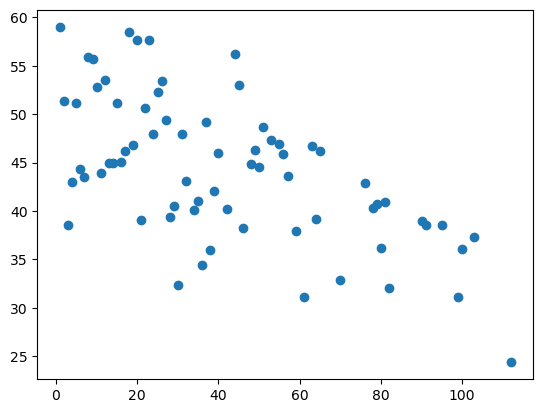

In [66]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [67]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_eu_airlines)

-0.15180413274193835

In [68]:
#randomised network
# eu_airlines_random
num=g_eu_airlines.number_of_nodes()
g1=nx.read_gml("graph_eu_airlines.gml")
g2=nx.read_gml("graph_eu_airlines_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [69]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{13: 47.06153846153846,
 91: 33.40659340659341,
 100: 32.36,
 99: 32.06060606060606,
 53: 41.60377358490566,
 80: 35.7125,
 15: 55.89523809523809,
 55: 39.2,
 42: 43.42063492063492,
 8: 53.984375,
 70: 32.57142857142857,
 25: 55.0,
 64: 37.484375,
 56: 40.973214285714285,
 78: 38.07692307692308,
 23: 49.95652173913044,
 37: 44.648648648648646,
 103: 33.56310679611651,
 34: 48.14705882352941,
 46: 38.66304347826087,
 40: 46.24166666666667,
 79: 36.177215189873415,
 82: 32.9390243902439,
 63: 39.57142857142857,
 48: 42.197916666666664,
 24: 49.854166666666664,
 59: 41.45762711864407,
 22: 51.63636363636363,
 95: 32.98421052631579,
 12: 51.07142857142857,
 17: 47.3235294117647,
 28: 49.5625,
 31: 48.913978494623656,
 27: 45.49382716049383,
 65: 39.69230769230769,
 50: 41.96666666666667,
 26: 44.782051282051285,
 49: 40.16326530612245,
 14: 53.089285714285715,
 81: 36.074074074074076,
 51: 38.568627450980394,
 10: 51.3,
 90: 35.53333333333333,
 32: 50.671875,
 16: 50.234375,
 76: 37.657894

In [70]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.22298548856727243

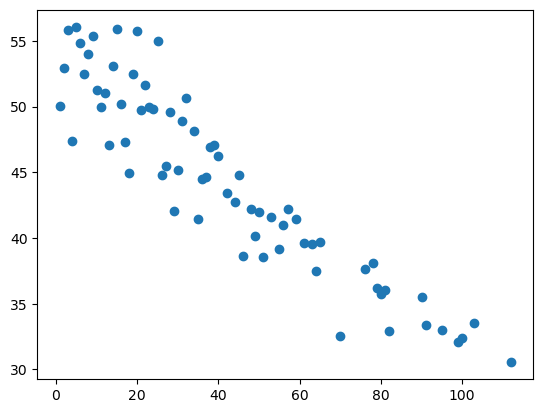

In [71]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

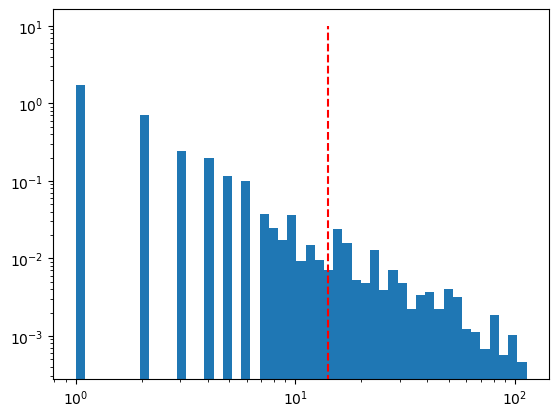

In [72]:
# plot the degree distribution of eu_airlines
k_eu_airlines=ave_degree(g_eu_airlines)
g_eu_airlines_degree=g_eu_airlines.degree()
g_eu_airlines_degrees = [ g_eu_airlines_degree[i] for i in g_eu_airlines.nodes() ]
my_bins = np.logspace(np.log10(min(g_eu_airlines_degrees)),np.log10(max(g_eu_airlines_degrees) +1),50) 
_ = plt.hist(g_eu_airlines_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_eu_airlines,0,10,colors = "r", linestyles = "dashed")
plt.show()

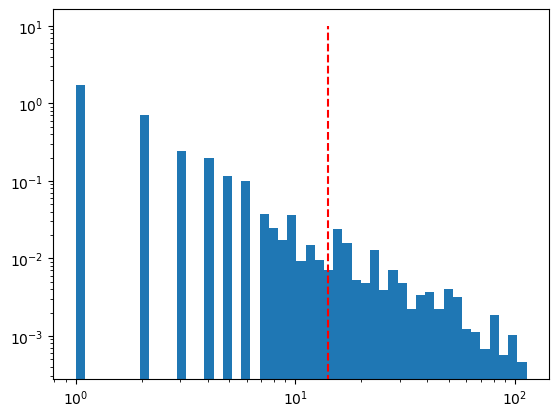

In [73]:
# plot the degree distribution of eu_airlines_random
k_eu_airlinesr=ave_degree(gf)
g_eu_airlinesr_degree=gf.degree()
g_eu_airlinesr_degrees = [ g_eu_airlinesr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_eu_airlinesr_degrees)),np.log10(max(g_eu_airlinesr_degrees) +1),50) 
_ = plt.hist(g_eu_airlinesr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_eu_airlinesr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [74]:
# calculate the clustering coefficient of eu_airlines
g_eu_airlines_clu=nx.clustering(g_eu_airlines)
g_eu_airlines_clu

{'0': 0.5897435897435898,
 '1': 0.2664224664224664,
 '2': 0.23252525252525252,
 '3': 0.16615130900845188,
 '4': 0.4462989840348331,
 '5': 0.2759493670886076,
 '6': 0.4095238095238095,
 '7': 0.3925925925925926,
 '8': 0.2497096399535424,
 '9': 0.32142857142857145,
 '10': 0.20124223602484473,
 '11': 0.44,
 '12': 0.33978174603174605,
 '13': 0.41883116883116883,
 '14': 0.30003330003330003,
 '15': 0.6047430830039525,
 '16': 0.45495495495495497,
 '17': 0.23872073101085095,
 '18': 0.28520499108734404,
 '19': 0.29178743961352654,
 '20': 0.3871794871794872,
 '21': 0.2914638104511522,
 '22': 0.20776874435411022,
 '23': 0.3824884792626728,
 '24': 0.4033687943262411,
 '25': 0.4673913043478261,
 '26': 0.2635885447106955,
 '27': 0.41904761904761906,
 '28': 0.42424242424242425,
 '29': 0.30735930735930733,
 '30': 0.25464725643896974,
 '31': 0.7316017316017316,
 '32': 0.6363636363636364,
 '33': 0.4528985507246377,
 '34': 0.7628458498023716,
 '35': 0.2609182530795073,
 '36': 0.3014705882352941,
 '37': 0.

In [75]:
# calculate the clustering coefficient of eu_airlines_random
g_eu_airlinesr_clu=nx.clustering(gf)
g_eu_airlinesr_clu

{'0': 0.5769230769230769,
 '1': 0.17973137973137973,
 '2': 0.16666666666666666,
 '3': 0.16697588126159554,
 '4': 0.2532656023222061,
 '5': 0.2088607594936709,
 '6': 0.47619047619047616,
 '7': 0.2585858585858586,
 '8': 0.2694541231126597,
 '9': 0.39285714285714285,
 '10': 0.1784679089026915,
 '11': 0.41333333333333333,
 '12': 0.2003968253968254,
 '13': 0.2305194805194805,
 '14': 0.22077922077922077,
 '15': 0.3715415019762846,
 '16': 0.26876876876876876,
 '17': 0.1819912430991814,
 '18': 0.33868092691622104,
 '19': 0.23671497584541062,
 '20': 0.2987179487179487,
 '21': 0.20188250567997404,
 '22': 0.16862390846130684,
 '23': 0.24782386072708654,
 '24': 0.23049645390070922,
 '25': 0.47101449275362317,
 '26': 0.2565751022793688,
 '27': 0.42857142857142855,
 '28': 0.2047138047138047,
 '29': 0.38095238095238093,
 '30': 0.15834266517357223,
 '31': 0.46320346320346323,
 '32': 0.4696969696969697,
 '33': 0.3188405797101449,
 '34': 0.36363636363636365,
 '35': 0.1818589025755879,
 '36': 0.235294117

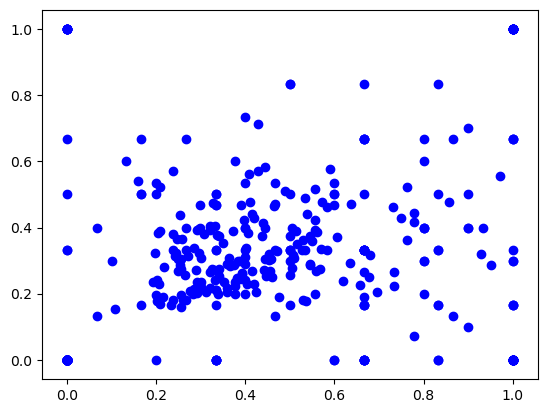

In [76]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_eu_airlines_clu.keys()
y1 = g_eu_airlines_clu.values()
y2 = g_eu_airlinesr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

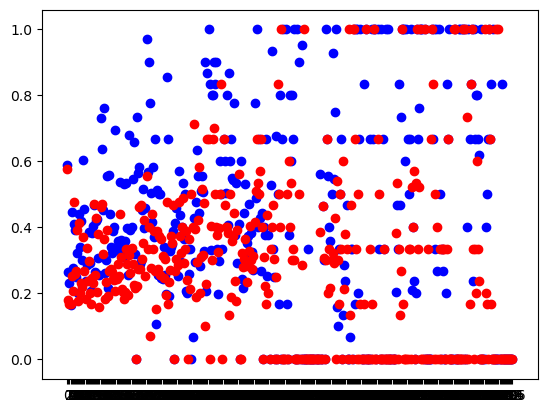

In [77]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">facebook and facebook_random</font>

<font size=4 face="黑体">A02.1</font>

In [78]:
# compute the average degree of the nearest neighbours
g_facebook = nx.read_gml("graph_facebook.gml")
ad=nx.average_degree_connectivity(g_facebook)
ad

{347: 18.959654178674352,
 17: 73.00773993808049,
 10: 86.40842105263158,
 13: 75.83739045764362,
 6: 120.46088435374149,
 20: 68.70555555555555,
 8: 93.57882882882883,
 57: 67.98245614035088,
 1: 478.02666666666664,
 31: 77.31748726655348,
 15: 71.15345911949686,
 9: 89.59777777777778,
 16: 72.2736280487805,
 65: 74.82538461538462,
 11: 85.54882154882155,
 69: 83.27329192546584,
 68: 87.53216911764706,
 5: 147.1290322580645,
 23: 70.6078753076292,
 2: 260.5408163265306,
 44: 76.02489177489177,
 24: 66.1138888888889,
 12: 85.67581300813008,
 22: 73.17388167388168,
 4: 142.31060606060606,
 7: 96.3862973760933,
 78: 86.73659673659674,
 19: 69.64473684210526,
 3: 203.87813620071685,
 26: 64.35576923076923,
 76: 92.59649122807018,
 14: 74.16420361247947,
 34: 72.12380300957592,
 21: 74.48717948717949,
 49: 92.27581941867656,
 32: 68.54758522727273,
 1045: 54.985645933014354,
 37: 66.47391577624136,
 40: 78.10648148148148,
 36: 80.7015503875969,
 62: 79.70665322580645,
 63: 85.5293305728088

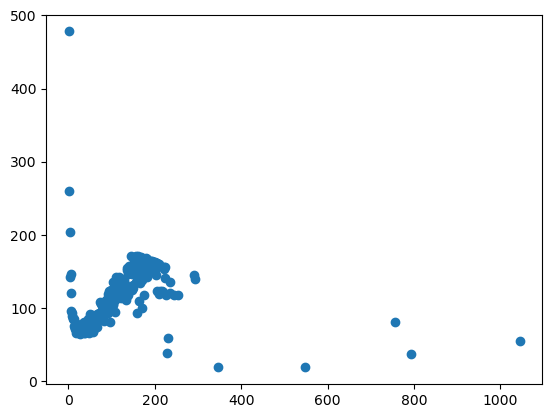

In [79]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [80]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_facebook)

0.06357722918564943

In [81]:
#randomised network
# facebook_random
num=g_facebook.number_of_nodes()
g1=nx.read_gml("graph_facebook.gml")
g2=nx.read_gml("graph_facebook_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [82]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{347: 84.95965417867436,
 17: 107.21284829721363,
 10: 115.54631578947368,
 13: 105.83933787731256,
 6: 128.01360544217687,
 20: 107.9095238095238,
 8: 117.47184684684684,
 57: 102.49199084668192,
 1: 191.36,
 31: 115.07385398981324,
 15: 106.82704402515724,
 9: 111.33777777777777,
 16: 107.79801829268293,
 65: 106.30923076923077,
 11: 111.25476992143659,
 69: 108.75258799171843,
 68: 108.12224264705883,
 5: 119.8258064516129,
 23: 114.18211648892535,
 2: 160.3826530612245,
 44: 99.67857142857143,
 24: 105.95555555555555,
 12: 111.15243902439025,
 22: 107.73160173160173,
 4: 111.1590909090909,
 7: 114.04518950437318,
 78: 105.81818181818181,
 19: 106.19590643274854,
 3: 158.93548387096774,
 26: 106.9065934065934,
 76: 106.15964912280701,
 14: 115.4343185550082,
 34: 110.13474692202462,
 21: 111.91483516483517,
 49: 104.7526283240569,
 32: 103.23863636363636,
 1045: 74.27081339712919,
 37: 105.64424890006285,
 40: 106.93240740740741,
 36: 107.77906976744185,
 62: 105.3366935483871,
 63:

In [83]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.03469329042239886

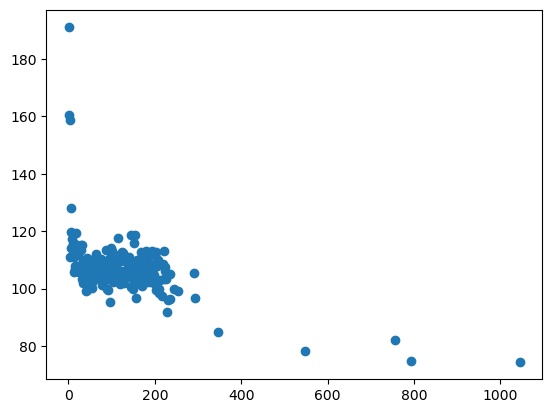

In [84]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

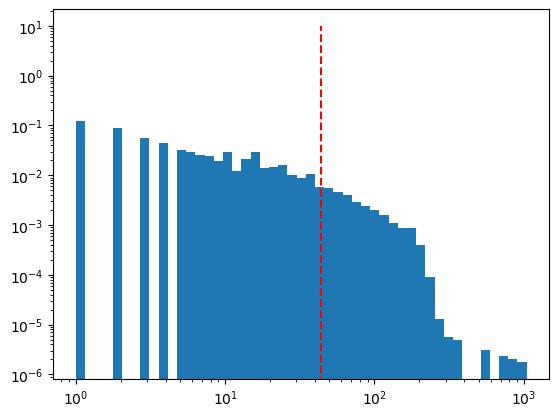

In [85]:
# plot the degree distribution of facebook
k_facebook=ave_degree(g_facebook)
g_facebook_degree=g_facebook.degree()
g_facebook_degrees = [ g_facebook_degree[i] for i in g_facebook.nodes() ]
my_bins = np.logspace(np.log10(min(g_facebook_degrees)),np.log10(max(g_facebook_degrees) +1),50) 
_ = plt.hist(g_facebook_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_facebook,0,10,colors = "r", linestyles = "dashed")
plt.show()

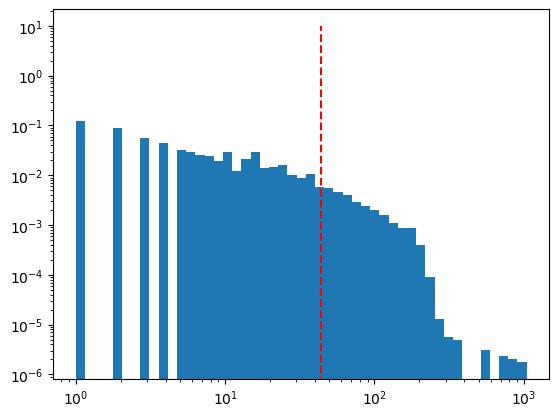

In [86]:
# plot the degree distribution of facebook_random
k_facebookr=ave_degree(gf)
g_facebookr_degree=gf.degree()
g_facebookr_degrees = [ g_facebookr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_facebookr_degrees)),np.log10(max(g_facebookr_degrees) +1),50) 
_ = plt.hist(g_facebookr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_facebookr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [87]:
# calculate the clustering coefficient of facebook
g_facebook_clu=nx.clustering(g_facebook)
g_facebook_clu

{'0': 0.04196165314587463,
 '1': 0.41911764705882354,
 '2': 0.8888888888888888,
 '3': 0.6323529411764706,
 '4': 0.8666666666666667,
 '5': 0.3333333333333333,
 '6': 0.9333333333333333,
 '7': 0.43157894736842106,
 '8': 0.6785714285714286,
 '9': 0.39724310776942356,
 '10': 0.8222222222222222,
 '11': 0,
 '12': 0,
 '13': 0.6516129032258065,
 '14': 0.7428571428571429,
 '15': 0,
 '16': 0.6666666666666666,
 '17': 0.7307692307692307,
 '18': 0,
 '19': 0.2833333333333333,
 '20': 0.6857142857142857,
 '21': 0.3490384615384615,
 '22': 0.4727272727272727,
 '23': 0.16911764705882354,
 '24': 0.9,
 '25': 0.2885763000852515,
 '26': 0.4113257243195786,
 '27': 0.9,
 '28': 0.7692307692307693,
 '29': 0.46153846153846156,
 '30': 0.5,
 '31': 0.43478260869565216,
 '32': 1.0,
 '33': 1.0,
 '34': 0.6,
 '35': 1.0,
 '36': 0.9636363636363636,
 '37': 0,
 '38': 0.3611111111111111,
 '39': 0.49523809523809526,
 '40': 0.4048625792811839,
 '41': 0.4673913043478261,
 '42': 1.0,
 '43': 0,
 '44': 1.0,
 '45': 0.727272727272727

In [88]:
# calculate the clustering coefficient of facebook_random
g_facebookr_clu=nx.clustering(gf)
g_facebookr_clu

{'0': 0.039829421465576116,
 '1': 0.04411764705882353,
 '2': 0.022222222222222223,
 '3': 0.029411764705882353,
 '4': 0,
 '5': 0.0641025641025641,
 '6': 0,
 '7': 0.06315789473684211,
 '8': 0.07142857142857142,
 '9': 0.05513784461152882,
 '10': 0.26666666666666666,
 '11': 0,
 '12': 0,
 '13': 0.08172043010752689,
 '14': 0.05714285714285714,
 '15': 0,
 '16': 0.25,
 '17': 0.10256410256410256,
 '18': 0,
 '19': 0.016666666666666666,
 '20': 0.01904761904761905,
 '21': 0.04038461538461539,
 '22': 0.03636363636363636,
 '23': 0.029411764705882353,
 '24': 0.016666666666666666,
 '25': 0.06436487638533675,
 '26': 0.05311676909569798,
 '27': 0.4,
 '28': 0.038461538461538464,
 '29': 0.02564102564102564,
 '30': 0.0661764705882353,
 '31': 0.05533596837944664,
 '32': 0.06666666666666667,
 '33': 0,
 '34': 0.1,
 '35': 0,
 '36': 0.12727272727272726,
 '37': 0,
 '38': 0.16666666666666666,
 '39': 0.10476190476190476,
 '40': 0.05179704016913319,
 '41': 0.043478260869565216,
 '42': 1.0,
 '43': 0,
 '44': 0,
 '45'

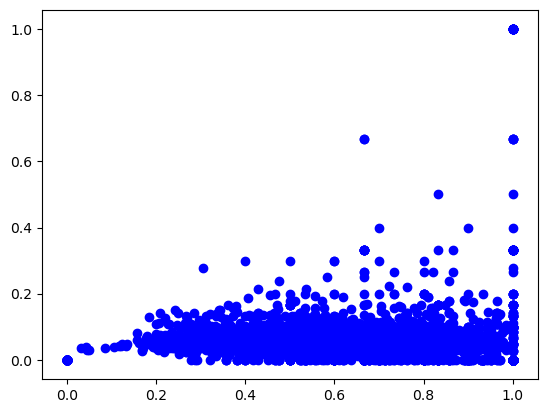

In [89]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_facebook_clu.keys()
y1 = g_facebook_clu.values()
y2 = g_facebookr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

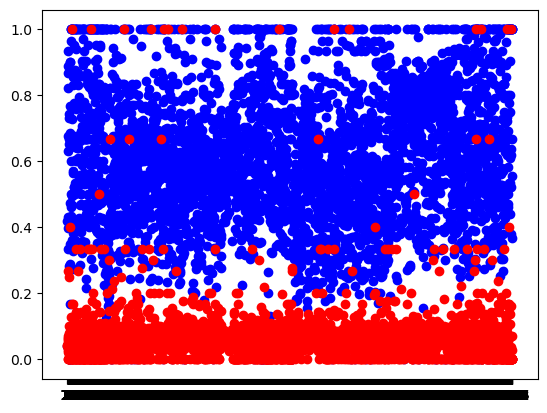

In [90]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">florentine_families and florentine_families_random</font>

<font size=4 face="黑体">A02.1</font>

In [91]:
# compute the average degree of the nearest neighbours
g_florentine_families = nx.read_gml("graph_florentine_families.gml")
ad=nx.average_degree_connectivity(g_florentine_families)
ad

{1: 8.0, 8: 2.625, 3: 5.0, 4: 4.208333333333333, 5: 4.0, 2: 5.0}

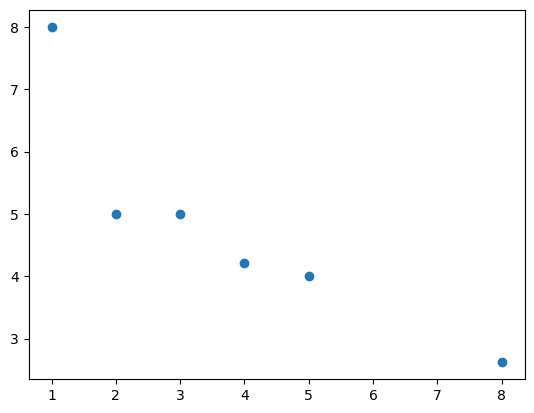

In [92]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [93]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_florentine_families)

-0.47862867319679353

In [94]:
#randomised network
# florentine_families_random
num=g_florentine_families.number_of_nodes()
g1=nx.read_gml("graph_florentine_families.gml")
g2=nx.read_gml("graph_florentine_families_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [95]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{1: 8.0, 8: 3.125, 3: 5.083333333333333, 4: 4.25, 5: 3.8, 2: 3.75}

In [96]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.33437221727515515

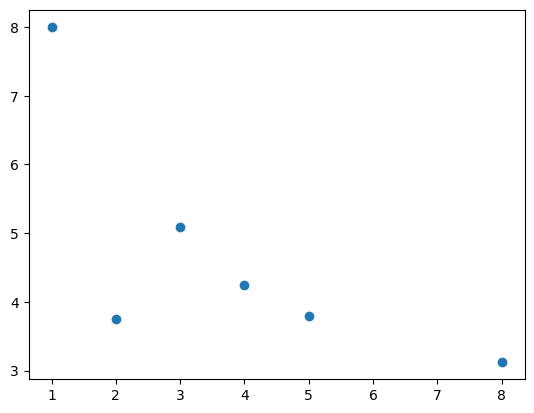

In [97]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

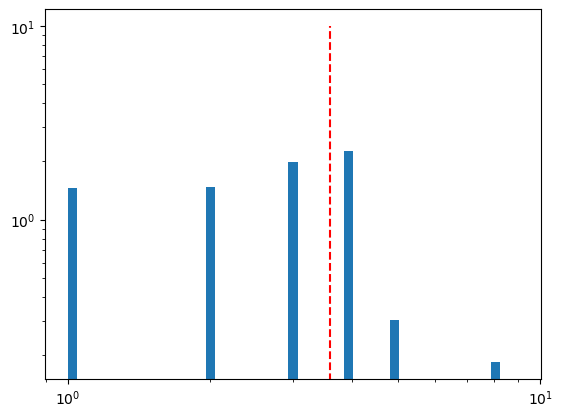

In [98]:
# plot the degree distribution of florentine_families
k_florentine_families=ave_degree(g_florentine_families)
g_florentine_families_degree=g_florentine_families.degree()
g_florentine_families_degrees = [ g_florentine_families_degree[i] for i in g_florentine_families.nodes() ]
my_bins = np.logspace(np.log10(min(g_florentine_families_degrees)),np.log10(max(g_florentine_families_degrees) +1),50) 
_ = plt.hist(g_florentine_families_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_florentine_families,0,10,colors = "r", linestyles = "dashed")
plt.show()

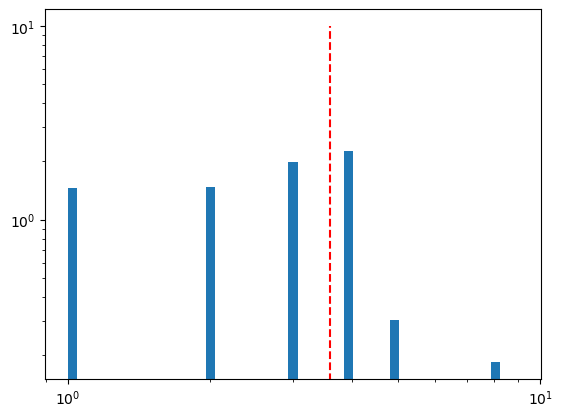

In [99]:
# plot the degree distribution of florentine_families_random
k_florentine_familiesr=ave_degree(gf)
g_florentine_familiesr_degree=gf.degree()
g_florentine_familiesr_degrees = [ g_florentine_familiesr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_florentine_familiesr_degrees)),np.log10(max(g_florentine_familiesr_degrees) +1),50) 
_ = plt.hist(g_florentine_familiesr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_florentine_familiesr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [100]:
# calculate the clustering coefficient of florentine_families
g_florentine_families_clu=nx.clustering(g_florentine_families)
g_florentine_families_clu

{'0': 0,
 '1': 0.14285714285714285,
 '2': 0.3333333333333333,
 '3': 0.6666666666666666,
 '4': 0.16666666666666666,
 '5': 0.3333333333333333,
 '6': 0.5,
 '7': 0.5,
 '8': 0.5,
 '9': 0.3333333333333333,
 '10': 0.5,
 '11': 0.3333333333333333,
 '12': 0.3333333333333333,
 '13': 1.0,
 '14': 1.0}

In [101]:
# calculate the clustering coefficient of florentine_families_random
g_florentine_familiesr_clu=nx.clustering(gf)
g_florentine_familiesr_clu

{'0': 0,
 '1': 0.14285714285714285,
 '2': 0.3333333333333333,
 '3': 0.3333333333333333,
 '4': 0.3333333333333333,
 '5': 0,
 '6': 0.5,
 '7': 0.4,
 '8': 0.16666666666666666,
 '9': 0.5,
 '10': 0.5,
 '11': 0.6666666666666666,
 '12': 0,
 '13': 0,
 '14': 0}

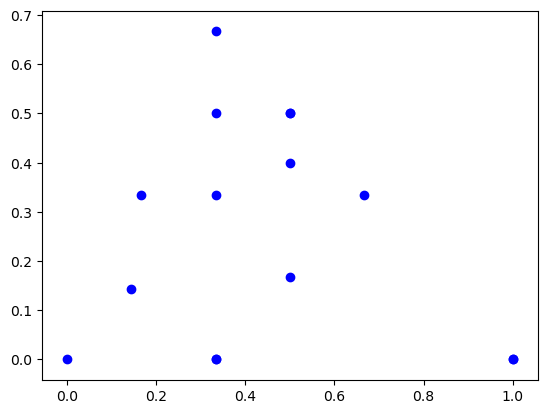

In [102]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_florentine_families_clu.keys()
y1 = g_florentine_families_clu.values()
y2 = g_florentine_familiesr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

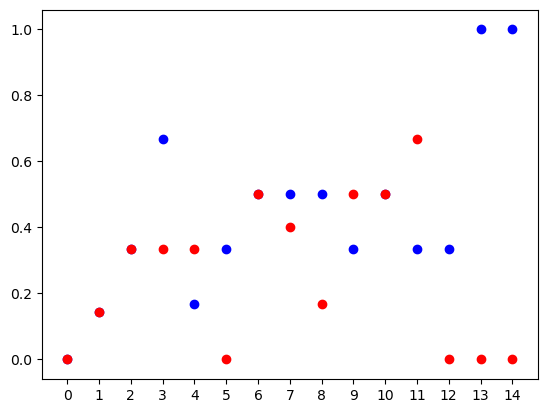

In [103]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">game_thrones and game_thrones_random</font>

<font size=4 face="黑体">A02.1</font>

In [104]:
# compute the average degree of the nearest neighbours
g_game_thrones = nx.read_gml("graph_game_thrones.gml")
ad=nx.average_degree_connectivity(g_game_thrones)
ad

{5: 13.672727272727272,
 4: 13.525,
 15: 7.533333333333333,
 2: 14.875,
 3: 15.25,
 6: 14.018518518518519,
 12: 13.25,
 24: 12.791666666666666,
 18: 14.0,
 36: 9.916666666666666,
 22: 11.409090909090908,
 7: 16.714285714285715,
 8: 13.75,
 9: 14.88888888888889,
 1: 14.25,
 14: 10.928571428571429,
 13: 14.538461538461538,
 20: 13.65,
 19: 14.68421052631579,
 26: 10.5,
 10: 14.0,
 25: 12.04}

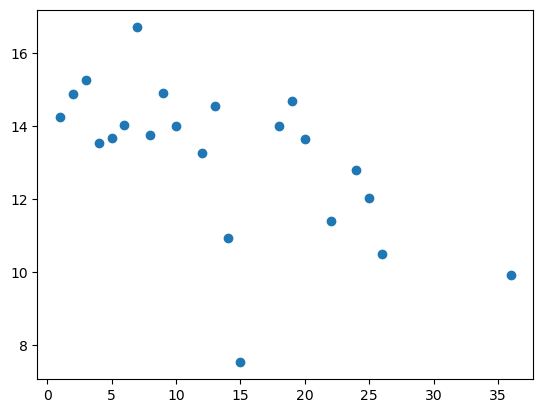

In [105]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [106]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_game_thrones)

-0.1307696836693023

In [107]:
#randomised network
# game_thrones_random
num=g_game_thrones.number_of_nodes()
g1=nx.read_gml("graph_game_thrones.gml")
g2=nx.read_gml("graph_game_thrones_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [108]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{5: 14.6,
 4: 14.425,
 15: 14.4,
 2: 17.041666666666668,
 3: 14.75,
 6: 13.333333333333334,
 12: 15.222222222222221,
 24: 11.0,
 18: 10.62962962962963,
 36: 10.305555555555555,
 22: 12.181818181818182,
 7: 14.952380952380953,
 8: 12.125,
 9: 15.222222222222221,
 1: 17.5625,
 14: 13.047619047619047,
 13: 14.0,
 20: 11.75,
 19: 10.631578947368421,
 26: 10.903846153846153,
 10: 14.0,
 25: 11.08}

In [109]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.17299264879790555

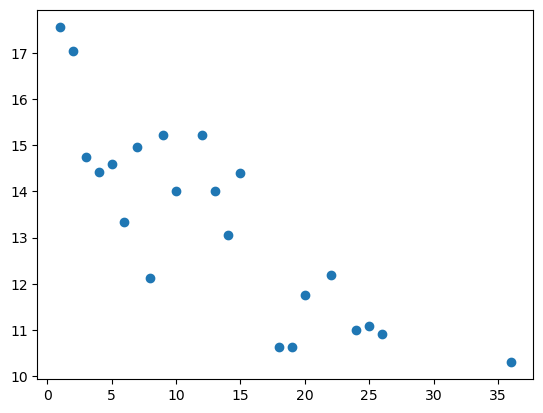

In [110]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

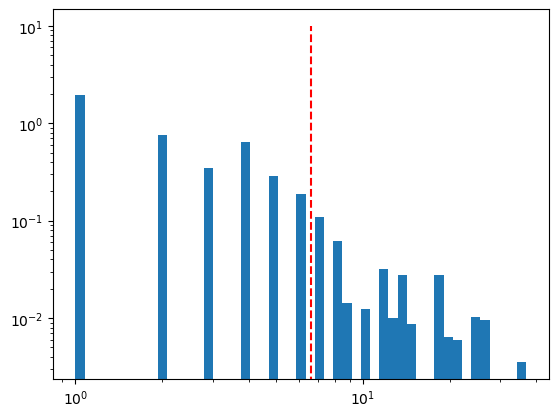

In [111]:
# plot the degree distribution of game_thrones
k_game_thrones=ave_degree(g_game_thrones)
g_game_thrones_degree=g_game_thrones.degree()
g_game_thrones_degrees = [ g_game_thrones_degree[i] for i in g_game_thrones.nodes() ]
my_bins = np.logspace(np.log10(min(g_game_thrones_degrees)),np.log10(max(g_game_thrones_degrees) +1),50) 
_ = plt.hist(g_game_thrones_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_game_thrones,0,10,colors = "r", linestyles = "dashed")
plt.show()

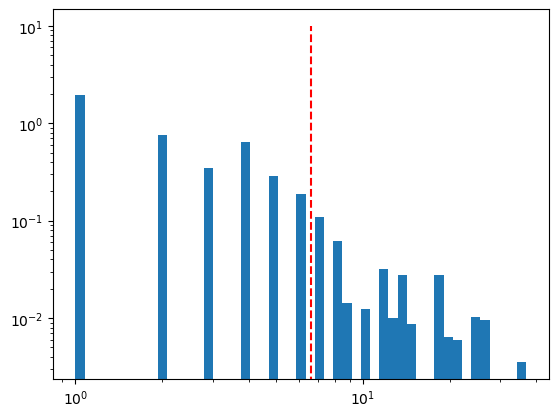

In [112]:
# plot the degree distribution of game_thrones_random
k_game_thronesr=ave_degree(gf)
g_game_thronesr_degree=gf.degree()
g_game_thronesr_degrees = [ g_game_thronesr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_game_thronesr_degrees)),np.log10(max(g_game_thronesr_degrees) +1),50) 
_ = plt.hist(g_game_thronesr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_game_thronesr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [113]:
# calculate the clustering coefficient of game_thrones
g_game_thrones_clu=nx.clustering(g_game_thrones)
g_game_thrones_clu

{'0': 0.7,
 '1': 0.8333333333333334,
 '2': 0.23809523809523808,
 '3': 1.0,
 '4': 0.6,
 '5': 1.0,
 '6': 1.0,
 '7': 0.4,
 '8': 0.3181818181818182,
 '9': 0.8,
 '10': 1.0,
 '11': 0.27898550724637683,
 '12': 0.2875816993464052,
 '13': 0.18095238095238095,
 '14': 0.22943722943722944,
 '15': 0.8,
 '16': 0.5333333333333333,
 '17': 0.6190476190476191,
 '18': 0.5357142857142857,
 '19': 0.6,
 '20': 0.5454545454545454,
 '21': 0.39215686274509803,
 '22': 0.5,
 '23': 0.9047619047619048,
 '24': 0,
 '25': 0.5714285714285714,
 '26': 0.3516483516483517,
 '27': 0.5,
 '28': 0.8,
 '29': 0.6666666666666666,
 '30': 1.0,
 '31': 0,
 '32': 1.0,
 '33': 1.0,
 '34': 0.4666666666666667,
 '35': 1.0,
 '36': 0.5714285714285714,
 '37': 0.42857142857142855,
 '38': 0.7142857142857143,
 '39': 0.5,
 '40': 1.0,
 '41': 0.5,
 '42': 0.6,
 '43': 0.5238095238095238,
 '44': 0.4642857142857143,
 '45': 0.35789473684210527,
 '46': 0.5,
 '47': 0.6071428571428571,
 '48': 1.0,
 '49': 1.0,
 '50': 1.0,
 '51': 1.0,
 '52': 1.0,
 '53': 0,
 

In [114]:
# calculate the clustering coefficient of game_thrones_random
g_game_thronesr_clu=nx.clustering(gf)
g_game_thronesr_clu

{'0': 0.2,
 '1': 0.3333333333333333,
 '2': 0.20952380952380953,
 '3': 0,
 '4': 0.1,
 '5': 0,
 '6': 0,
 '7': 0.13333333333333333,
 '8': 0.2878787878787879,
 '9': 0.1,
 '10': 0.5,
 '11': 0.14130434782608695,
 '12': 0.11764705882352941,
 '13': 0.12857142857142856,
 '14': 0.18614718614718614,
 '15': 0.2,
 '16': 0.2,
 '17': 0.23809523809523808,
 '18': 0.03571428571428571,
 '19': 0.1,
 '20': 0.24242424242424243,
 '21': 0.12418300653594772,
 '22': 0.2222222222222222,
 '23': 0.38095238095238093,
 '24': 0,
 '25': 0.21428571428571427,
 '26': 0.1978021978021978,
 '27': 0.3,
 '28': 0.1,
 '29': 0.16666666666666666,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0.3333333333333333,
 '34': 0,
 '35': 0.3333333333333333,
 '36': 0.14285714285714285,
 '37': 0.38095238095238093,
 '38': 0.14285714285714285,
 '39': 0.1,
 '40': 0.3333333333333333,
 '41': 0.20512820512820512,
 '42': 0.1,
 '43': 0.23809523809523808,
 '44': 0.2857142857142857,
 '45': 0.16842105263157894,
 '46': 0,
 '47': 0.21428571428571427,
 '48': 0,
 '

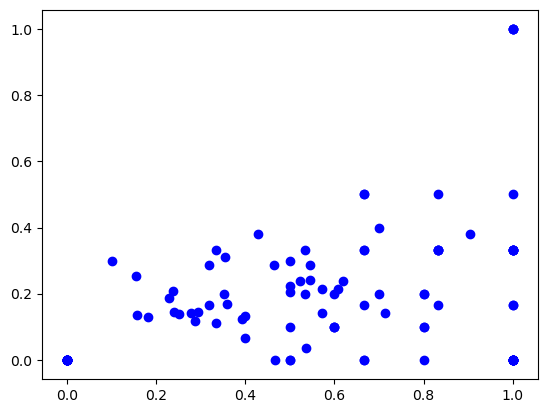

In [115]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_game_thrones_clu.keys()
y1 = g_game_thrones_clu.values()
y2 = g_game_thronesr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

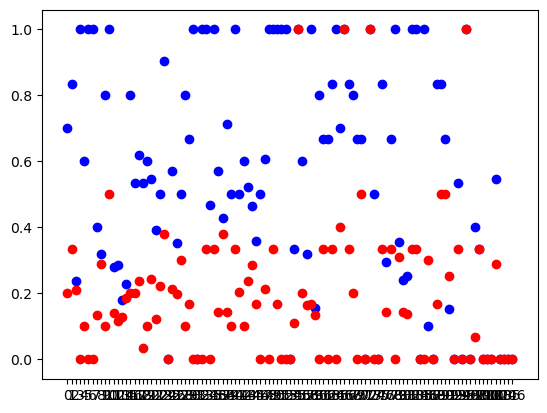

In [116]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">internet and internet_random</font>

<font size=4 face="黑体">A02.1</font>

In [119]:
# compute the average degree of the nearest neighbours
g_internet = nx.read_gml("graph_internet.gml")
ad=nx.average_degree_connectivity(g_internet)
ad

{221: 8.176470588235293,
 2: 612.8776318606809,
 11: 440.9351351351351,
 906: 86.63465783664459,
 730: 101.46849315068494,
 18: 367.5458553791887,
 2183: 16.033440219880898,
 2695: 22.74100185528757,
 1: 476.71038151137196,
 252: 112.56746031746032,
 50: 352.8514285714286,
 3: 542.1377036827729,
 1661: 60.77423239012643,
 23: 338.413487133984,
 1537: 63.64281067013663,
 10: 403.4582914572864,
 169: 185.41420118343194,
 2371: 15.07802614930409,
 138: 261.7391304347826,
 13: 419.3976244343891,
 819: 98.5934065934066,
 48: 381.2604166666667,
 143: 147.41958041958043,
 122: 119.32786885245902,
 357: 161.38655462184875,
 72: 313.88368055555554,
 206: 59.31553398058252,
 6: 476.5037523452158,
 392: 146.67857142857142,
 545: 137.01100917431194,
 85: 288.0729411764706,
 20: 354.6875,
 1496: 23.00668449197861,
 212: 179.1745283018868,
 67: 340.1940298507463,
 214: 196.78504672897196,
 123: 197.97018970189703,
 7: 458.0401360544218,
 1460: 54.071917808219176,
 47: 403.0099290780142,
 535: 72.663

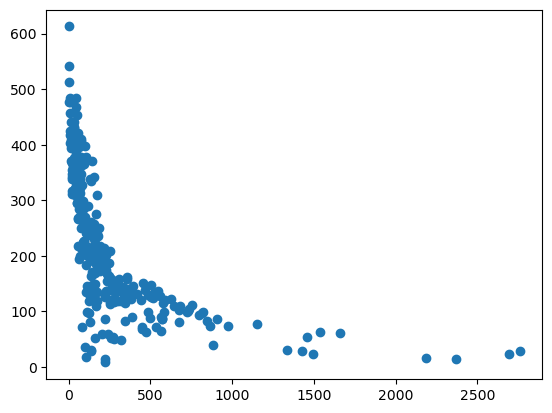

In [120]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [121]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_internet)

-0.21486656615730235

In [122]:
#randomised network
# internet_random
num=g_internet.number_of_nodes()
g1=nx.read_gml("graph_internet.gml")
g2=nx.read_gml("graph_internet_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [123]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{221: 171.12217194570135,
 2: 513.6067732495897,
 11: 442.76068796068796,
 906: 92.22737306843267,
 730: 103.15479452054795,
 18: 403.1763668430335,
 2183: 47.085203847915714,
 2695: 40.16734693877551,
 1: 482.09666177549525,
 252: 192.9206349206349,
 50: 347.54571428571427,
 3: 492.8608834887445,
 1661: 58.441902468392534,
 23: 409.18988464951195,
 1537: 61.17436564736499,
 10: 425.7251256281407,
 169: 226.01775147928993,
 2371: 42.7536904259806,
 138: 294.07246376811594,
 13: 417.47511312217193,
 819: 99.12820512820512,
 48: 352.53819444444446,
 143: 251.21328671328672,
 122: 247.2295081967213,
 357: 165.66666666666666,
 72: 299.55381944444446,
 206: 203.3252427184466,
 6: 470.4427767354597,
 392: 144.15051020408163,
 545: 119.59816513761469,
 85: 283.50588235294117,
 20: 422.04833333333335,
 1496: 58.86631016042781,
 212: 202.49685534591194,
 67: 308.56716417910445,
 214: 221.19626168224298,
 123: 309.20867208672087,
 7: 462.98979591836735,
 1460: 64.00205479452055,
 47: 364.9035460

In [124]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.19778189898717918

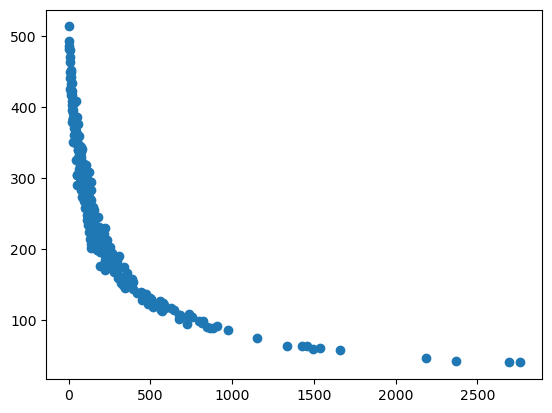

In [125]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

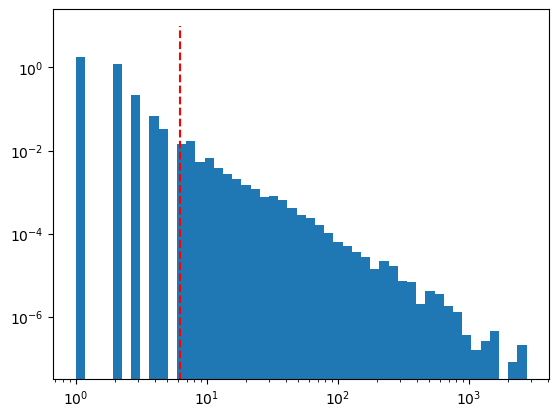

In [126]:
# plot the degree distribution of internet
k_internet=ave_degree(g_internet)
g_internet_degree=g_internet.degree()
g_internet_degrees = [ g_internet_degree[i] for i in g_internet.nodes() ]
my_bins = np.logspace(np.log10(min(g_internet_degrees)),np.log10(max(g_internet_degrees) +1),50) 
_ = plt.hist(g_internet_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_internet,0,10,colors = "r", linestyles = "dashed")
plt.show()

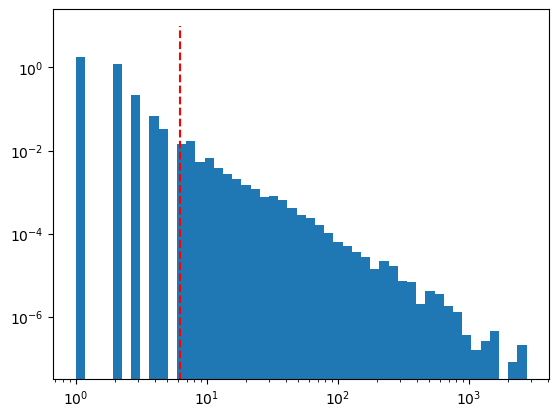

In [127]:
# plot the degree distribution of internet_random
k_internetr=ave_degree(gf)
g_internetr_degree=gf.degree()
g_internetr_degrees = [ g_internetr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_internetr_degrees)),np.log10(max(g_internetr_degrees) +1),50) 
_ = plt.hist(g_internetr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_internetr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [128]:
# calculate the clustering coefficient of internet
g_internet_clu=nx.clustering(g_internet)
g_internet_clu

{'0': 0.0016042780748663102,
 '1': 0,
 '2': 0.05454545454545454,
 '3': 0,
 '4': 0.05537058041540131,
 '5': 0.06958678617734934,
 '6': 0.0196078431372549,
 '7': 0,
 '8': 0.0013020368626328017,
 '9': 1.0,
 '10': 0.001948120815445028,
 '11': 0,
 '12': 0.0850565990008221,
 '13': 0.045714285714285714,
 '14': 0.3333333333333333,
 '15': 0.022570232767312477,
 '16': 0.8853754940711462,
 '17': 0.02699895630015181,
 '18': 0.5777777777777777,
 '19': 0.06234150464919696,
 '20': 0,
 '21': 0.0011602930629779312,
 '22': 0.6666666666666666,
 '23': 0.22881624880990162,
 '24': 0.9615384615384616,
 '25': 0.06793125375032466,
 '26': 0.6666666666666666,
 '27': 0,
 '28': 0,
 '29': 0.037624347483502414,
 '30': 0,
 '31': 0.24444444444444444,
 '32': 0.3333333333333333,
 '33': 0.055277062728627556,
 '34': 1.0,
 '35': 0.14902590249582978,
 '36': 0.6658841940532081,
 '37': 0.021027705422685294,
 '38': 0.26666666666666666,
 '39': 0.15362231849261443,
 '40': 0.7555555555555555,
 '41': 0.09059633027522936,
 '42': 1.

In [129]:
# calculate the clustering coefficient of internet_random
g_internetr_clu=nx.clustering(gf)
g_internetr_clu

{'0': 0.07449609214315096,
 '1': 1.0,
 '2': 0.32727272727272727,
 '3': 0,
 '4': 0.028809776444330613,
 '5': 0.03386887648683691,
 '6': 0.26143790849673204,
 '7': 0,
 '8': 0.00842188177706828,
 '9': 0,
 '10': 0.006339656737365932,
 '11': 0,
 '12': 0.08145196989818504,
 '13': 0.12244897959183673,
 '14': 0.6666666666666666,
 '15': 0.01290919245918049,
 '16': 0.16600790513833993,
 '17': 0.014272934287573194,
 '18': 0.28888888888888886,
 '19': 0.09072978303747535,
 '20': 1.0,
 '21': 0.007035077510068034,
 '22': 1.0,
 '23': 0.1658732677456892,
 '24': 0.3076923076923077,
 '25': 0.03236101035612038,
 '26': 0.22872340425531915,
 '27': 0.13333333333333333,
 '28': 0,
 '29': 0.09652319511474441,
 '30': 0,
 '31': 0.2,
 '32': 0.3333333333333333,
 '33': 0.12477984013006367,
 '34': 0,
 '35': 0.07010669436313852,
 '36': 0.15610328638497653,
 '37': 0.0859104901728629,
 '38': 0,
 '39': 0.058184143222506396,
 '40': 0.2,
 '41': 0.0439692390717755,
 '42': 0.3333333333333333,
 '43': 0.12016806722689076,
 '44

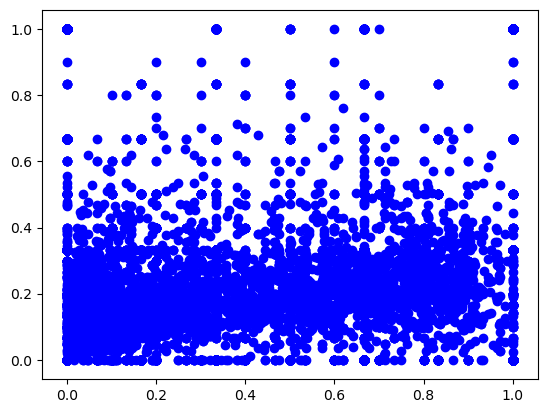

In [130]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_internet_clu.keys()
y1 = g_internet_clu.values()
y2 = g_internetr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

<font size=6 face="黑体">jazz_collab and jazz_collab_random</font>

<font size=4 face="黑体">A02.1</font>

In [131]:
# compute the average degree of the nearest neighbours
g_jazz_collab = nx.read_gml("graph_jazz_collab.gml")
ad=nx.average_degree_connectivity(g_jazz_collab)
ad

{23: 39.04830917874396,
 21: 45.166666666666664,
 29: 40.08275862068965,
 43: 41.24031007751938,
 12: 39.69444444444444,
 96: 36.927083333333336,
 20: 34.325,
 26: 43.67948717948718,
 42: 40.0,
 40: 35.16,
 46: 37.81304347826087,
 60: 41.43333333333333,
 49: 42.8469387755102,
 56: 43.0,
 75: 40.50666666666667,
 10: 33.85,
 74: 38.067567567567565,
 45: 36.111111111111114,
 17: 40.423529411764704,
 41: 36.05487804878049,
 39: 39.123931623931625,
 100: 34.18,
 31: 37.76702508960574,
 52: 36.29807692307692,
 8: 32.875,
 19: 34.067669172932334,
 24: 35.516666666666666,
 48: 42.46875,
 38: 39.18421052631579,
 25: 38.536,
 34: 43.450980392156865,
 37: 40.927927927927925,
 32: 43.708333333333336,
 30: 40.53333333333333,
 33: 41.621212121212125,
 14: 42.17857142857143,
 55: 40.345454545454544,
 51: 36.23529411764706,
 18: 37.833333333333336,
 27: 43.93333333333333,
 53: 41.34905660377358,
 62: 39.5,
 9: 31.85185185185185,
 59: 39.271186440677965,
 36: 43.19444444444444,
 28: 38.607142857142854,

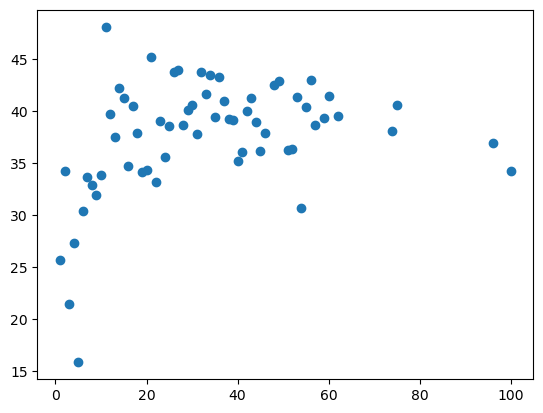

In [132]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [133]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_jazz_collab)

0.020237399275047713

In [134]:
#randomised network
# jazz_collab_random
num=g_jazz_collab.number_of_nodes()
g1=nx.read_gml("graph_jazz_collab.gml")
g2=nx.read_gml("graph_jazz_collab_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [135]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{23: 37.95652173913044,
 21: 37.80952380952381,
 29: 40.324137931034485,
 43: 36.96124031007752,
 12: 35.77777777777778,
 96: 33.302083333333336,
 20: 40.6375,
 26: 40.51282051282051,
 42: 39.01587301587302,
 40: 37.895,
 46: 39.3304347826087,
 60: 36.50833333333333,
 49: 38.755102040816325,
 56: 38.88392857142857,
 75: 36.45333333333333,
 10: 36.05,
 74: 35.270270270270274,
 45: 37.644444444444446,
 17: 38.8235294117647,
 41: 39.68292682926829,
 39: 39.93589743589744,
 100: 33.22,
 31: 39.946236559139784,
 52: 36.81730769230769,
 8: 43.041666666666664,
 19: 39.857142857142854,
 24: 39.916666666666664,
 48: 39.291666666666664,
 38: 40.10526315789474,
 25: 40.408,
 34: 40.205882352941174,
 37: 38.711711711711715,
 32: 37.979166666666664,
 30: 36.11666666666667,
 33: 41.31818181818182,
 14: 47.17857142857143,
 55: 37.10909090909091,
 51: 38.84313725490196,
 18: 40.333333333333336,
 27: 38.65925925925926,
 53: 36.5,
 62: 38.693548387096776,
 9: 39.18518518518518,
 59: 37.44915254237288,
 

In [136]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.07169022183094564

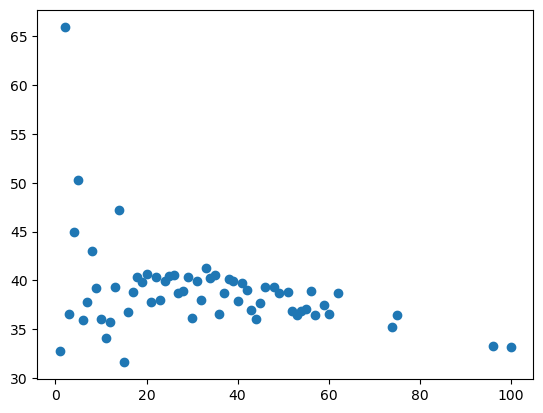

In [137]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

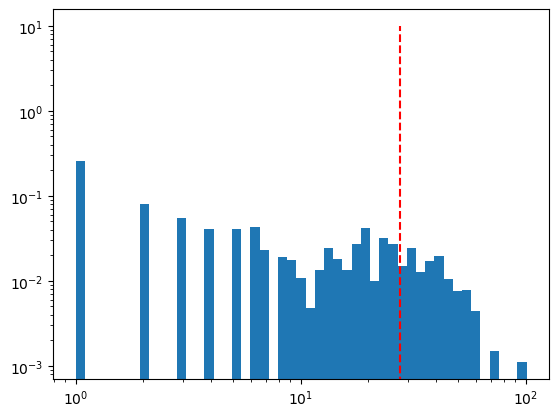

In [138]:
# plot the degree distribution of jazz_collab
k_jazz_collab=ave_degree(g_jazz_collab)
g_jazz_collab_degree=g_jazz_collab.degree()
g_jazz_collab_degrees = [ g_jazz_collab_degree[i] for i in g_jazz_collab.nodes() ]
my_bins = np.logspace(np.log10(min(g_jazz_collab_degrees)),np.log10(max(g_jazz_collab_degrees) +1),50) 
_ = plt.hist(g_jazz_collab_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_jazz_collab,0,10,colors = "r", linestyles = "dashed")
plt.show()

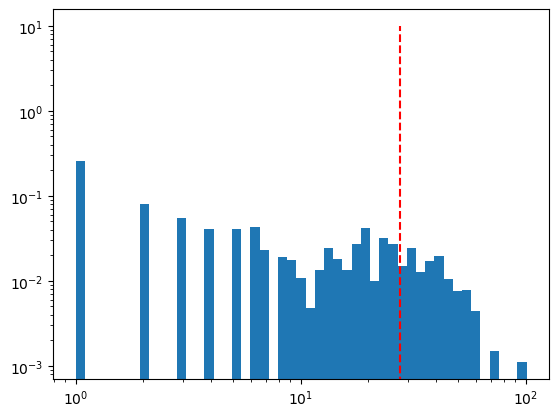

In [139]:
# plot the degree distribution of jazz_collab_random
k_jazz_collabr=ave_degree(gf)
g_jazz_collabr_degree=gf.degree()
g_jazz_collabr_degrees = [ g_jazz_collabr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_jazz_collabr_degrees)),np.log10(max(g_jazz_collabr_degrees) +1),50) 
_ = plt.hist(g_jazz_collabr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_jazz_collabr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [140]:
# calculate the clustering coefficient of jazz_collab
g_jazz_collab_clu=nx.clustering(g_jazz_collab)
g_jazz_collab_clu

{'0': 0.6561264822134387,
 '1': 0.7428571428571429,
 '2': 0.4802955665024631,
 '3': 0.6356589147286822,
 '4': 0.5151515151515151,
 '5': 0.6482213438735178,
 '6': 0.31162280701754386,
 '7': 0.5157894736842106,
 '8': 0.46153846153846156,
 '9': 0.4831591173054588,
 '10': 0.5128205128205128,
 '11': 0.6405797101449275,
 '12': 0.46497175141242936,
 '13': 0.5952380952380952,
 '14': 0.592687074829932,
 '15': 0.4624505928853755,
 '16': 0.5157894736842106,
 '17': 0.4858757062146893,
 '18': 0.512987012987013,
 '19': 0.40396396396396395,
 '20': 0.6356589147286822,
 '21': 0.4666666666666667,
 '22': 0.36208811551277303,
 '23': 0.4626262626262626,
 '24': 0.6838235294117647,
 '25': 0.6323366555924695,
 '26': 0.41585365853658535,
 '27': 0.45209176788124156,
 '28': 0.23717171717171717,
 '29': 0.524731182795699,
 '30': 0.39064856711915535,
 '31': 0.6083743842364532,
 '32': 0.9285714285714286,
 '33': 0.47368421052631576,
 '34': 0.4746376811594203,
 '35': 0.5718085106382979,
 '36': 0.6699857752489331,
 '37

In [141]:
# calculate the clustering coefficient of jazz_collab_random
g_jazz_collabr_clu=nx.clustering(gf)
g_jazz_collabr_clu

{'0': 0.2885375494071146,
 '1': 0.2571428571428571,
 '2': 0.2660098522167488,
 '3': 0.20376522702104097,
 '4': 0.09090909090909091,
 '5': 0.18972332015810275,
 '6': 0.19517543859649122,
 '7': 0.24736842105263157,
 '8': 0.3446153846153846,
 '9': 0.27293844367015097,
 '10': 0.27564102564102566,
 '11': 0.2541062801932367,
 '12': 0.22598870056497175,
 '13': 0.27380952380952384,
 '14': 0.2423469387755102,
 '15': 0.28063241106719367,
 '16': 0.37894736842105264,
 '17': 0.24519774011299436,
 '18': 0.2811688311688312,
 '19': 0.2363963963963964,
 '20': 0.2646733111849391,
 '21': 0.2,
 '22': 0.22510181414291003,
 '23': 0.24848484848484848,
 '24': 0.18382352941176472,
 '25': 0.24473975636766335,
 '26': 0.3,
 '27': 0.21727395411605938,
 '28': 0.20242424242424242,
 '29': 0.23225806451612904,
 '30': 0.22850678733031674,
 '31': 0.3054187192118227,
 '32': 0.5,
 '33': 0.28654970760233917,
 '34': 0.3188405797101449,
 '35': 0.2712765957446808,
 '36': 0.267425320056899,
 '37': 0.3466666666666667,
 '38': 0.

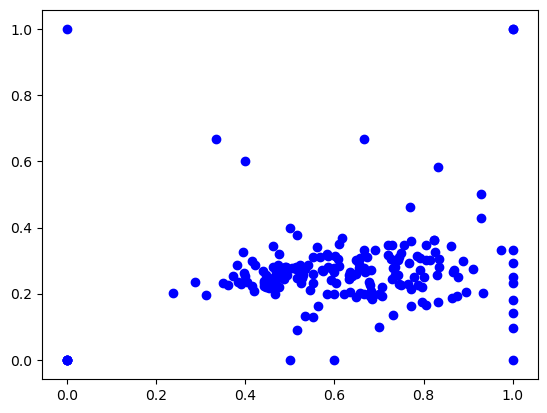

In [142]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_jazz_collab_clu.keys()
y1 = g_jazz_collab_clu.values()
y2 = g_jazz_collabr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

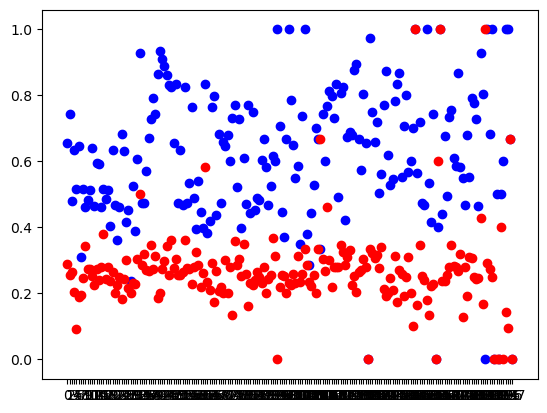

In [143]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()

<font size=6 face="黑体">terrorists and terrorists_random</font>

<font size=4 face="黑体">A02.1</font>

In [144]:
# compute the average degree of the nearest neighbours
g_terrorists = nx.read_gml("graph_terrorists.gml")
ad=nx.average_degree_connectivity(g_terrorists)
ad

{1: 11.6,
 11: 5.590909090909091,
 2: 7.444444444444445,
 4: 9.3,
 3: 6.125,
 6: 7.533333333333333,
 22: 7.045454545454546,
 5: 10.48,
 7: 7.285714285714286,
 8: 8.2,
 10: 8.4,
 9: 10.38888888888889,
 18: 7.833333333333333,
 13: 8.076923076923077}

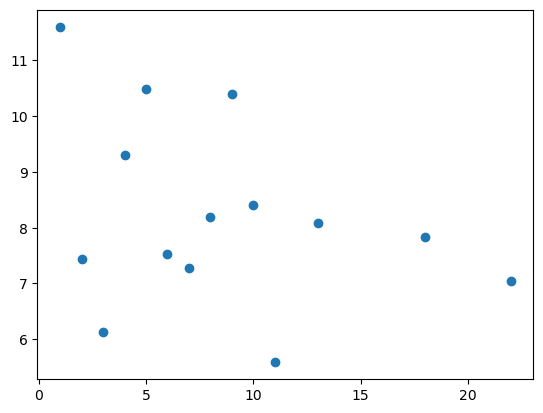

In [145]:
# plot
x=ad.keys()
y=ad.values()
plt.scatter(x,y)
plt.show()

In [146]:
# compute the assortativity coefficient of the real network
nx.degree_assortativity_coefficient(g_terrorists)

-0.08047566178575725

In [147]:
#randomised network
# terrorists_random
num=g_terrorists.number_of_nodes()
g1=nx.read_gml("graph_terrorists.gml")
g2=nx.read_gml("graph_terrorists_random.gml")
if num<1000:
    gf=nx.algorithms.smallworld.random_reference(g1,niter = num, connectivity=False)
else:
    gf=g2

In [148]:
# compute the average degree of the nearest neighbours
adr=nx.average_degree_connectivity(gf)
adr

{1: 7.9,
 11: 6.636363636363637,
 2: 10.833333333333334,
 4: 9.1,
 3: 11.583333333333334,
 6: 7.433333333333334,
 22: 5.636363636363637,
 5: 9.32,
 7: 9.5,
 8: 8.875,
 10: 4.6,
 9: 7.833333333333333,
 18: 4.833333333333333,
 13: 6.0}

In [149]:
# compute the assortativity coefficient of the ramdomised network
nx.degree_assortativity_coefficient(gf)

-0.2747065518710149

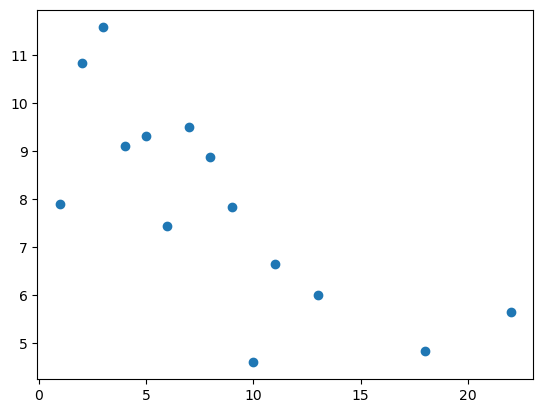

In [150]:
# plot
x=adr.keys()
y=adr.values()
plt.scatter(x,y)
plt.show()

<font size=4 face="黑体">A02.2</font>

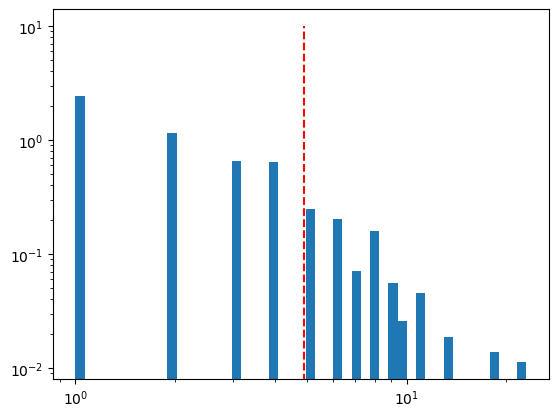

In [151]:
# plot the degree distribution of terrorists
k_terrorists=ave_degree(g_terrorists)
g_terrorists_degree=g_terrorists.degree()
g_terrorists_degrees = [ g_terrorists_degree[i] for i in g_terrorists.nodes() ]
my_bins = np.logspace(np.log10(min(g_terrorists_degrees)),np.log10(max(g_terrorists_degrees) +1),50) 
_ = plt.hist(g_terrorists_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_terrorists,0,10,colors = "r", linestyles = "dashed")
plt.show()

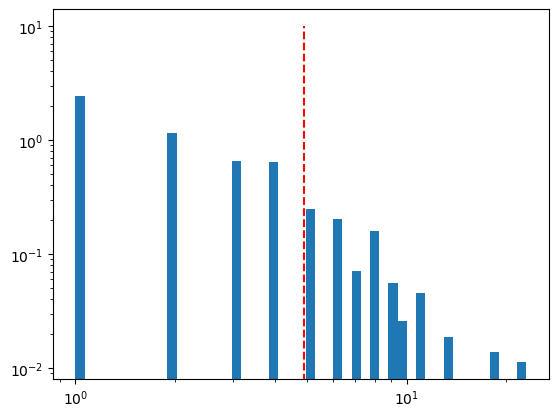

In [152]:
# plot the degree distribution of terrorists_random
k_terroristsr=ave_degree(gf)
g_terroristsr_degree=gf.degree()
g_terroristsr_degrees = [ g_terroristsr_degree[i] for i in gf.nodes() ]
my_bins = np.logspace(np.log10(min(g_terroristsr_degrees)),np.log10(max(g_terroristsr_degrees) +1),50) 
_ = plt.hist(g_terroristsr_degrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_terroristsr,0,10,colors = "r", linestyles = "dashed")
plt.show()

In [153]:
# calculate the clustering coefficient of terrorists
g_terrorists_clu=nx.clustering(g_terrorists)
g_terrorists_clu

{'0': 0,
 '1': 0.10909090909090909,
 '2': 0,
 '3': 0,
 '4': 1.0,
 '5': 0.5,
 '6': 1.0,
 '7': 0.6666666666666666,
 '8': 1.0,
 '9': 0.26666666666666666,
 '10': 0.3333333333333333,
 '11': 0.17316017316017315,
 '12': 0.3,
 '13': 0.3333333333333333,
 '14': 0,
 '15': 0.19047619047619047,
 '16': 0.6666666666666666,
 '17': 0.17857142857142858,
 '18': 0.6666666666666666,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0.5,
 '23': 1.0,
 '24': 0.4222222222222222,
 '25': 1.0,
 '26': 0.7,
 '27': 1.0,
 '28': 1.0,
 '29': 0.6428571428571429,
 '30': 0.5,
 '31': 0.2875816993464052,
 '32': 0,
 '33': 0,
 '34': 0.8333333333333334,
 '35': 0.6071428571428571,
 '36': 0.8,
 '37': 0.5,
 '38': 0.9333333333333333,
 '39': 0.5357142857142857,
 '40': 0.5555555555555556,
 '41': 0.7,
 '42': 0.3333333333333333,
 '43': 0.2948717948717949,
 '44': 0.23636363636363636,
 '45': 0,
 '46': 0,
 '47': 0.4642857142857143,
 '48': 0.19047619047619047,
 '49': 0.6666666666666666,
 '50': 0.3333333333333333,
 '51': 0.3,
 '52': 0.5,
 '53': 0.33333

In [154]:
# calculate the clustering coefficient of terrorists_random
g_terroristsr_clu=nx.clustering(gf)
g_terroristsr_clu

{'0': 0,
 '1': 0.12727272727272726,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0.6666666666666666,
 '8': 1.0,
 '9': 0.06666666666666667,
 '10': 0.3333333333333333,
 '11': 0.09956709956709957,
 '12': 0.1,
 '13': 0,
 '14': 0,
 '15': 0.19047619047619047,
 '16': 0,
 '17': 0.2857142857142857,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0.3333333333333333,
 '23': 0,
 '24': 0.08888888888888889,
 '25': 0,
 '26': 0.2,
 '27': 0.3333333333333333,
 '28': 0.3,
 '29': 0.17857142857142858,
 '30': 0.25,
 '31': 0.06535947712418301,
 '32': 0,
 '33': 0,
 '34': 0.16666666666666666,
 '35': 0.14285714285714285,
 '36': 0.2,
 '37': 0.16666666666666666,
 '38': 0.3333333333333333,
 '39': 0.21428571428571427,
 '40': 0.1111111111111111,
 '41': 0.2,
 '42': 0.3333333333333333,
 '43': 0.07692307692307693,
 '44': 0.14545454545454545,
 '45': 0,
 '46': 0,
 '47': 0.17857142857142858,
 '48': 0.2857142857142857,
 '49': 0.3333333333333333,
 '50': 0,
 '51': 0.2,
 '52': 0,
 '53': 0.06666666666666667,
 '54': 0.3333

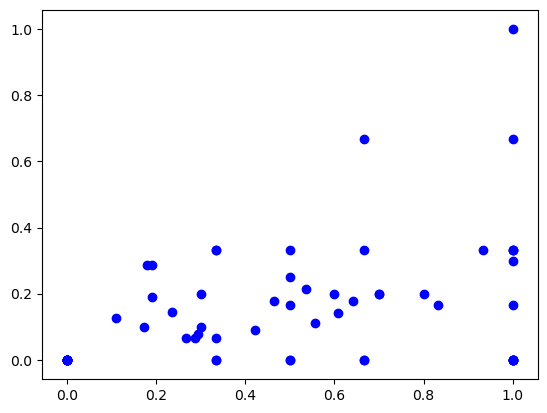

In [155]:
# plot a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)
x = g_terrorists_clu.keys()
y1 = g_terrorists_clu.values()
y2 = g_terroristsr_clu.values()
plt.scatter(y1,y2,c = "b")
plt.show()

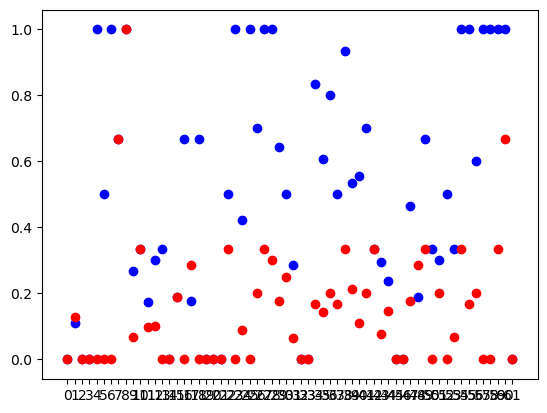

In [156]:
# plot 𝐶(𝑖)(blur nodes) and 𝐶𝑟𝑛𝑑(𝑖)(red nodes)
plt.scatter(x,y1,c = "b")
plt.scatter(x,y2,c = "r")
plt.show()